









## Table of Content
- [Introduction](#introduction)

- [Exploratory Data Analysis (EDA)](#eda)
   - [Univariate Analysis](#uni)      
   - [Multivariate Analysis](#multi)  
    
- [Supervised Learning](#supervised)  
    - [Linear Models](#linear-models)
        - [Linear Regression](#linear)  
        - [Ridge Regression](#ridge) 
    - [Ensemble Models](#ensemble-models)  
        - [Random Forest Regressor](#random)
        -[Extra Trees Regressor](#extra) 
    - [Support vector machines (SVM)](#svm) 
    - [k-nearest neighbors (k-NN)](#knn)  
    
- [Unsupervised Learning](#unsuper)  
    - [Principal Component Analysis (PCA) and Factor Analysis of Mixed Data (FAMD)](#pcafamd)  
        - [PCA](#pca)  
        - [FAMD](#famd) 
    - [Clustering](#clust)  
        - [K-Means](#kmeans)  
        - [K-Modes](#kmodes)  
        - [Hierarchical Clustering](#hir)  
    
- [Semi-Supervised Learning](#semi) 

- [Other Studies](#ref) 

- [Conclusion](#conclusion)

    

## Introduction <a class="anchor" id="introduction"></a>

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.


## Dataset

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data. 

## Reference

1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

## Installing Libraries

In [3]:
%%capture

import sys
!{sys.executable} -m pip install numpy;
!{sys.executable} -m pip install pandas;
!{sys.executable} -m pip install scikit-learn;
!{sys.executable} -m pip install seaborn;
!{sys.executable} -m pip install matplotlib;
!{sys.executable} -m pip install pandoc


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Exploratory Data Analysis (EDA)  <a class="anchor" id="eda"></a>

Exploratory data analysis (EDA) is an approach to analyzing and summarizing a dataset, with the goal of discovering patterns, trends, and relationships within the data. It is a crucial step in the data science process, as it helps to identify any issues with the data and gives you a better understanding of the data you are working with. EDA involves visualizing the data using plots and graphs, as well as using statistical techniques to summarize and describe the data. The main goal of EDA is to gain insights and understanding of the data, rather than to confirm hypotheses or build predictive models.

### Dataset characteristics

   - instant: record index
   - dteday : date
   - season : season (1:springer, 2:summer, 3:fall, 4:winter)
   - yr : year (0: 2011, 1:2012)
   - mnth : month ( 1 to 12)
   - hr : hour (0 to 23)
   - holiday : weather day is holiday or not 
   - weekday : day of the week
   - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
   - weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
   - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
   - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
   - hum: Normalized humidity. The values are divided to 100 (max)
   - windspeed: Normalized wind speed. The values are divided to 67 (max)
   - casual: count of casual users
   - registered: count of registered users
   - cnt: count of total rental bikes including both casual and registered
	

In [5]:
df = pd.read_csv("hour.csv")

In [6]:
df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

## Univariate Analysis  <a class="anchor" id="uni"></a>

The analyzed dataset presents 17379 observations and 17 features. Luckily, there are no missing values. 

In this Univariate analysis, variables are going to be analyzed one by one.

In [5]:
df.shape
# 17379 observation, 17 features

(17379, 17)

In [6]:
# No Missing values in the dataset 

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

From the following line of code we get a brief analysis about some main statistical metrics. From this table it is clear that some categorical variables have been misinterpret as numerical by the system and their datatype must be changed.

We take advantage of a simple for-cicle to change the data-types of our features

In [7]:
df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [8]:
# Let's check our data types
# Some categorical variables are int64 or float64, must be converted
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in cols:
    df[col] = df[col].astype('category')         

In [8]:
# We remove 'instant' and 'dteday', ID and timestamp variable.
# Not useful for our analysis

(df
.drop(columns=['instant', 'dteday'])
.info()
)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  category
 3   hr          17379 non-null  category
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  category
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   atemp       17379 non-null  float64 
 10  hum         17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  casual      17379 non-null  int64   
 13  registered  17379 non-null  int64   
 14  cnt         17379 non-null  int64   
dtypes: category(8), float64(4), int64(3)
memory usage: 1.1 MB


In [9]:
df.describe(include = ['category'])

season     yr   mnth     hr  holiday  weekday  workingday  weathersit
count    17379  17379  17379  17379    17379    17379       17379       17379
unique       4      2     12     24        2        7           2           4
top          3      1      5     17        0        6           1           1
freq      4496   8734   1488    730    16879     2512       11865       11413

Now we can use the command "describe" specifically for the categorical variables that we had just converted. This time the command shows us statistical metrics in accordance with the categorical nature of our features.

Such as the unique counting of the values, the frequency by wich they appear and et cetera

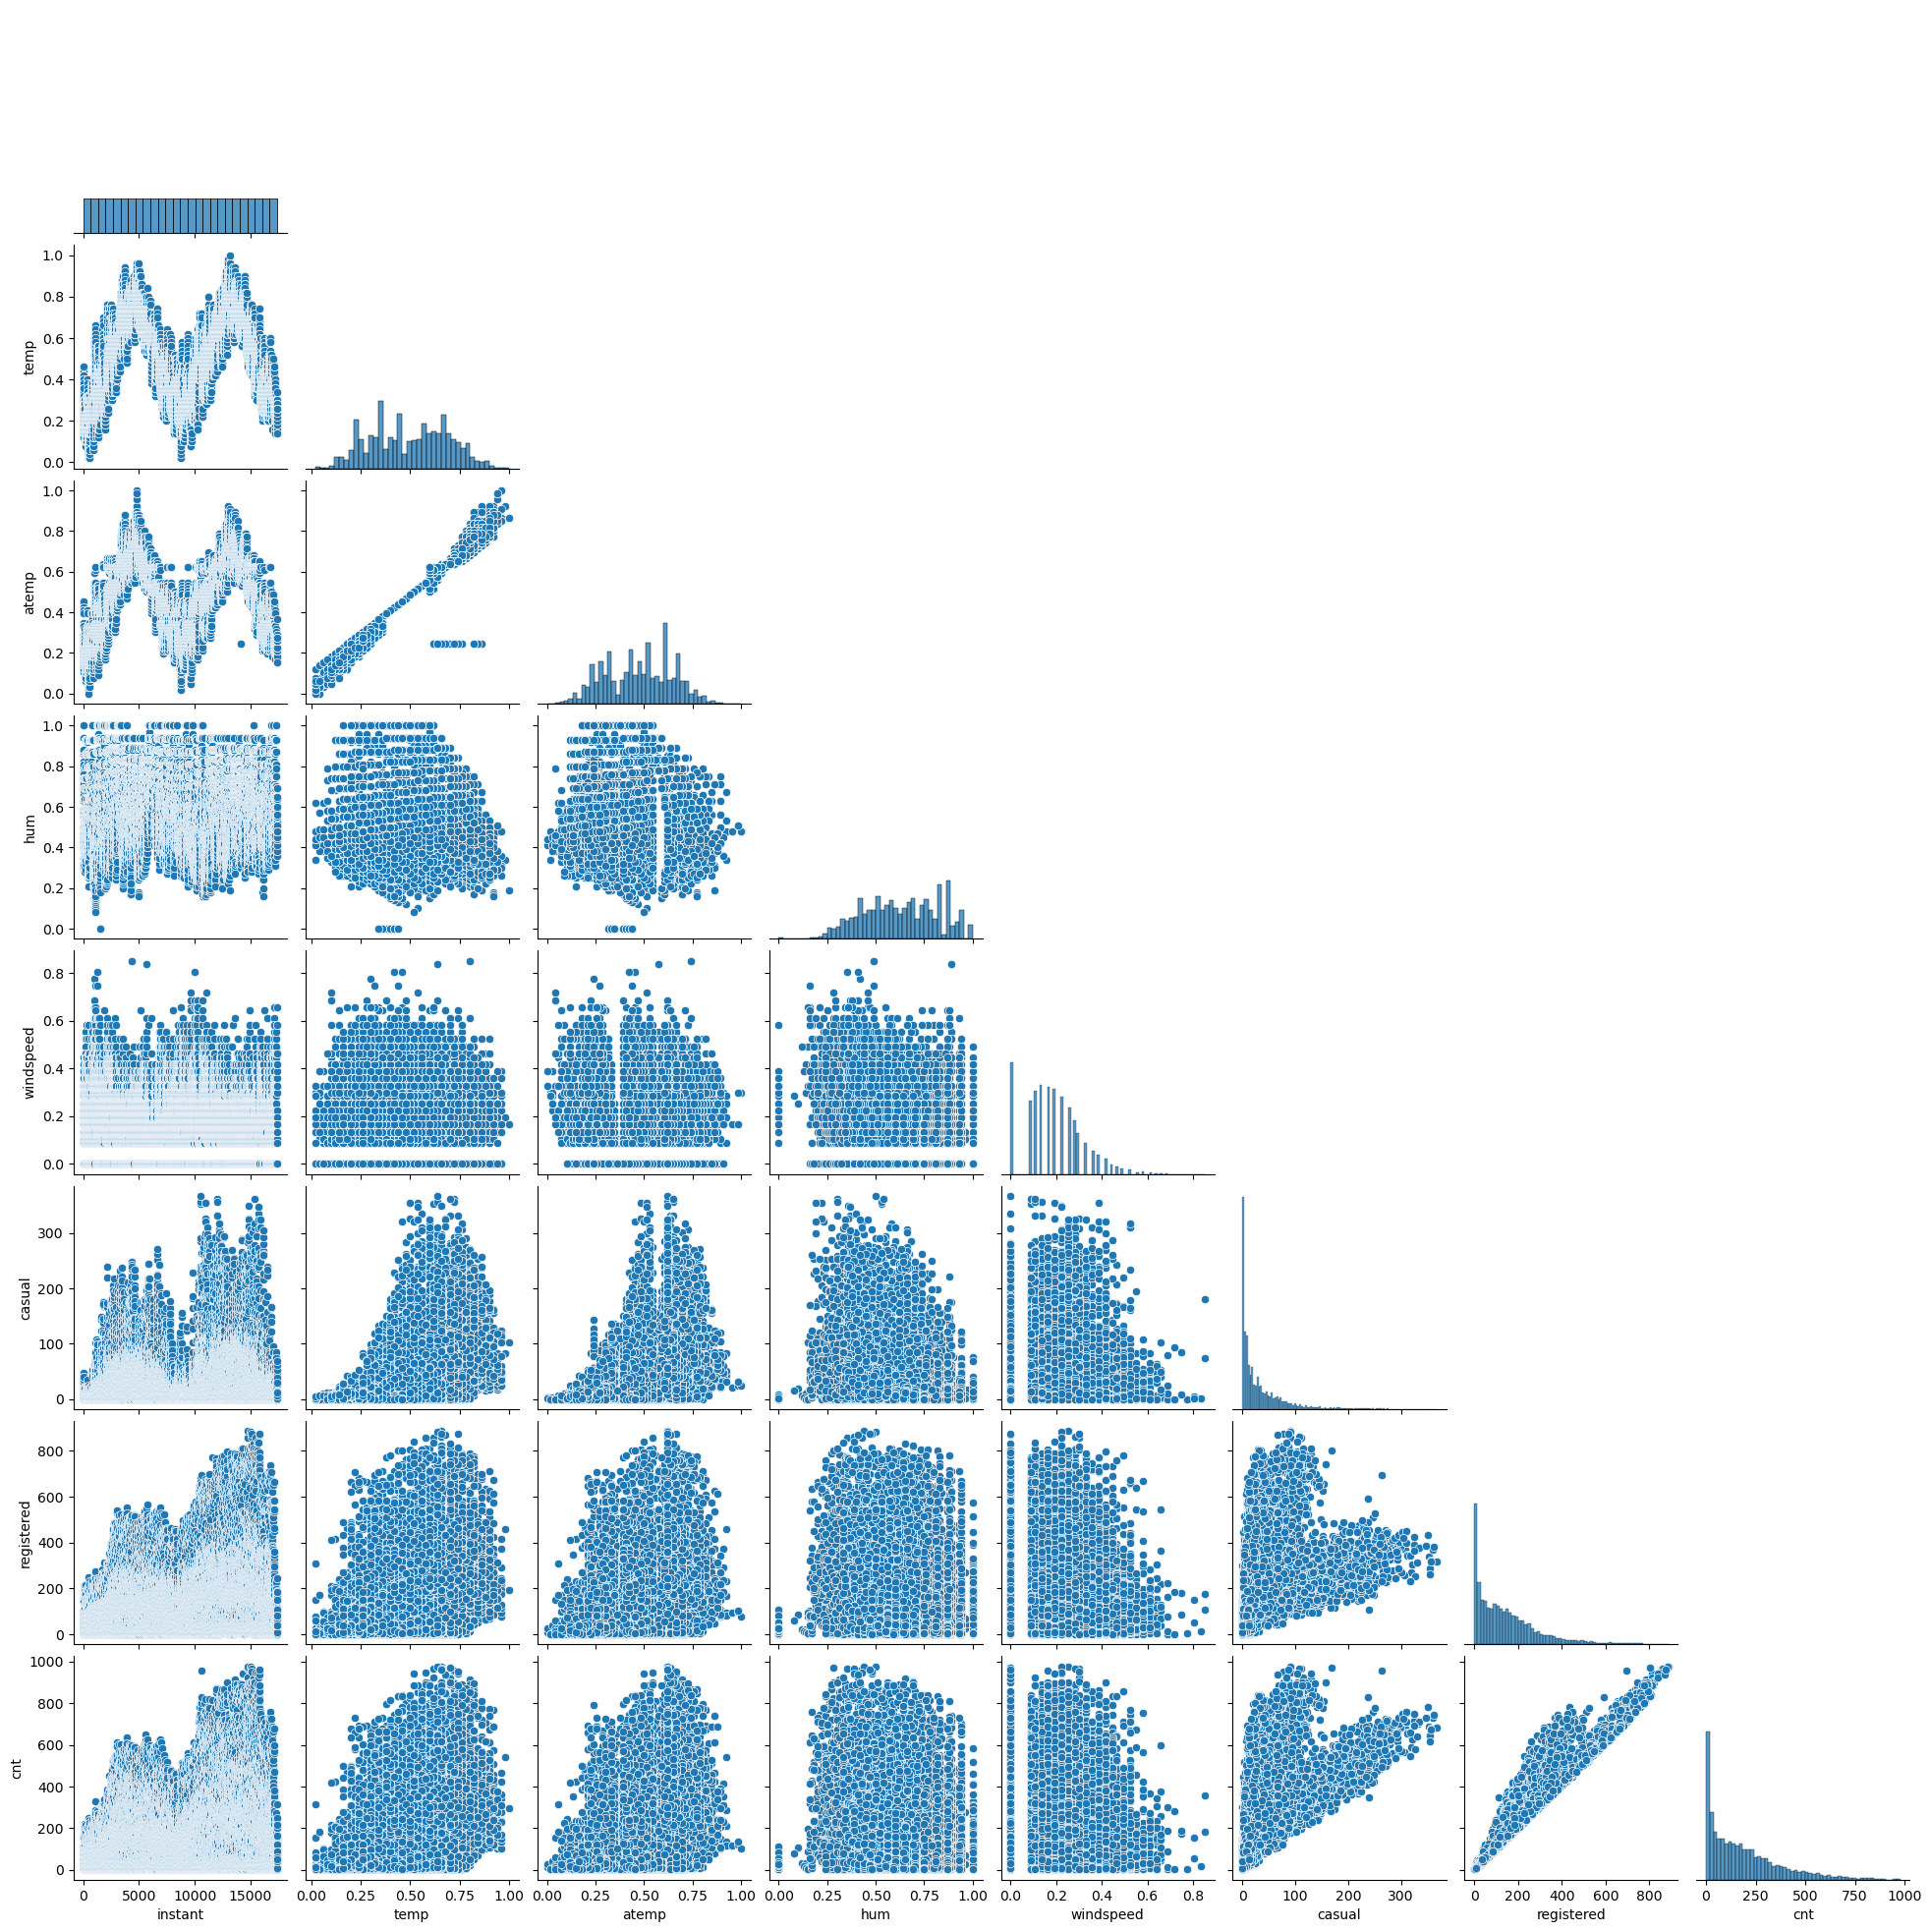

In [12]:
sns.pairplot(df, corner=True)

## Multivariate Analysis <a class="anchor" id="multi"></a>

### Count vs Categorical Variables

In this following section we perform multivariate analysis in which pairs or multiple variables are taken and gotten analyzed together. The aim is to understand the possible and underlying relationships between the features

_How many bike per season?_

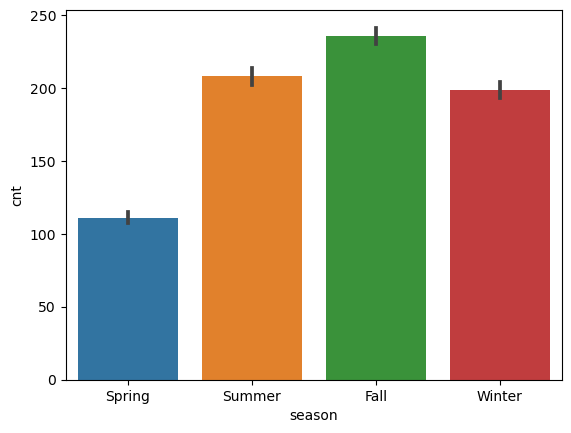

In [67]:
# season (1:spring, 2:summer, 3:fall, 4:winter)
sns.barplot(data=df, x='season', y='cnt')
plt.xticks([0,1, 2, 3], ['Spring', 'Summer', 'Fall','Winter']) 
plt.show()


_How many bikes per year?_

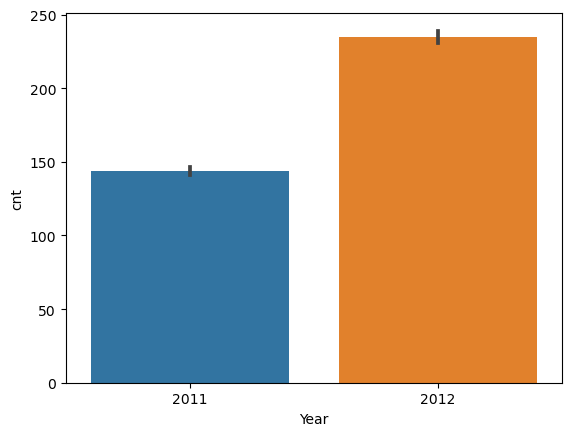

In [77]:
sns.barplot(data=df, x='yr', y='cnt')
plt.xlabel('Year')
plt.xticks([0,1], ['2011', '2012']) 
plt.show()


_How many bikes per month?_

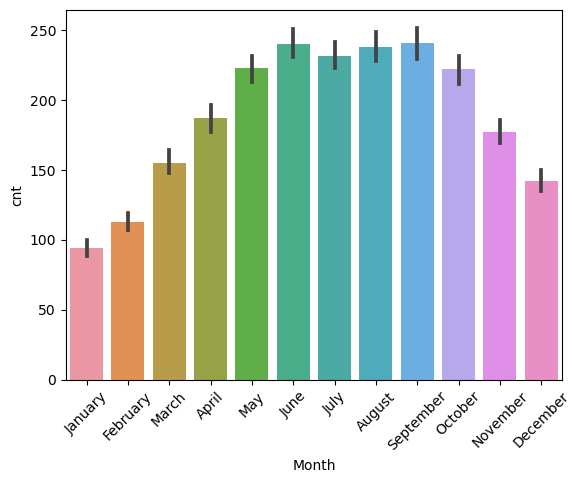

In [81]:
sns.barplot(data=df, x='mnth', y='cnt')
plt.xlabel('Month')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['January', 'February' ,'March', 'April', 'May' ,'June', 'July' ,'August', 'September', 'October' ,'November' ,'December' ], rotation = (45)) 
plt.show()


_How many bikes per hour?_


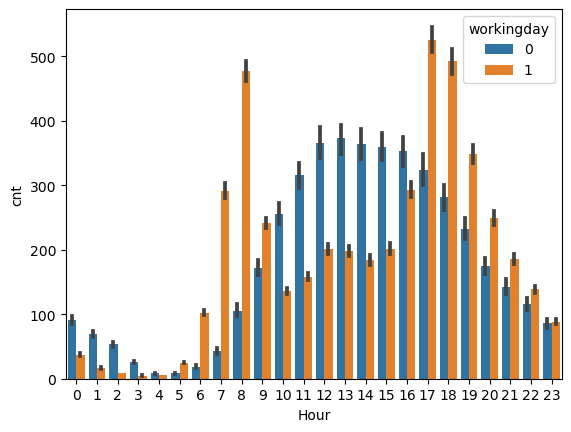

In [82]:
sns.barplot(data=df, x='hr', y='cnt', hue='workingday')
plt.xlabel('Hour')
plt.show()

_How many bikes during holidays?_

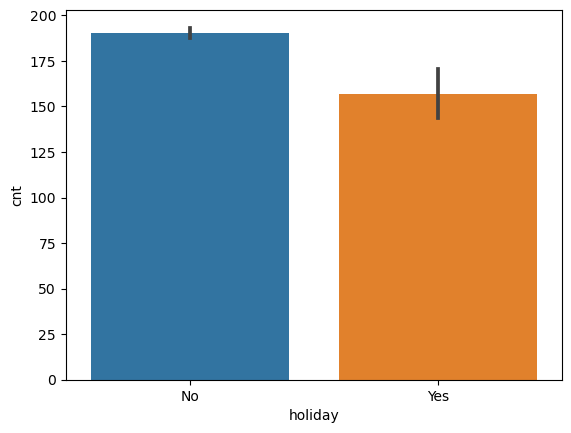

In [83]:
sns.barplot(data=df, x='holiday', y='cnt')
plt.xticks([0,1], ['No', 'Yes']) 
plt.show()

_How many bikes during the week?_


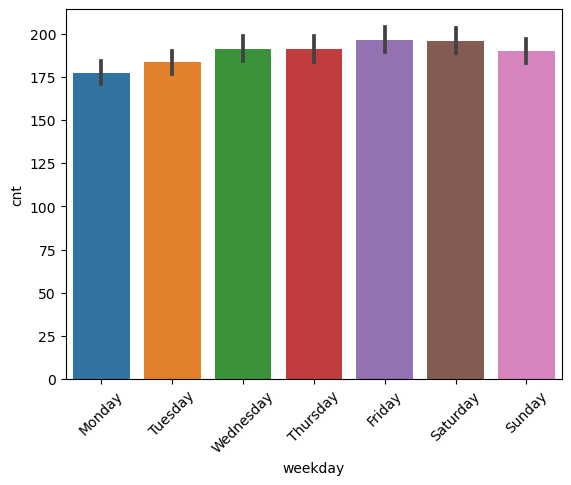

In [85]:
sns.barplot(data=df, x='weekday', y='cnt')
plt.xticks([0,1,2,3,4,5,6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],rotation = (45)) 
plt.show()

_How many bikes during the weekend?_

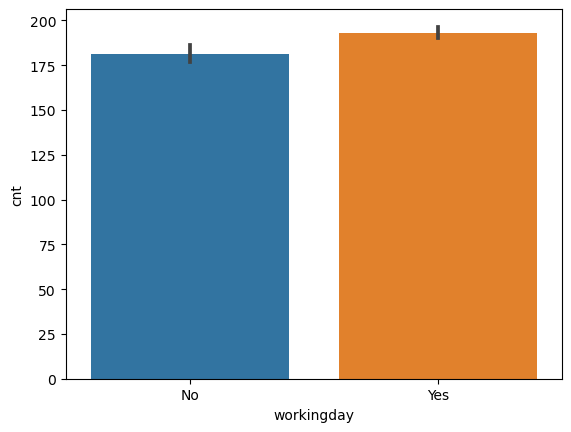

In [86]:
sns.barplot(data=df, x='workingday', y='cnt')
plt.xticks([0,1], ['No', 'Yes']) 

plt.show()

_How does the weather affect the number of bikes?_


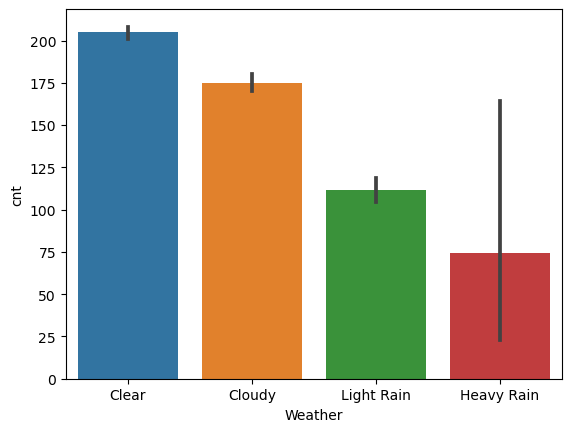

In [87]:
sns.barplot(data=df, x='weathersit', y='cnt')
plt.xticks([0,1, 2, 3], ['Clear', 'Cloudy', 'Light Rain','Heavy Rain']) 
plt.xlabel('Weather')
plt.show()

### Count vs Numerical Variables
_Densitiy maps_

Most rents happen when the temperature is mild.
_CNT_ distribution is really positive skewed: most of the times the number of bikes rented is low, almost 0.

The map confirms that when temperature is warm and the number of bikes of rented gets higher

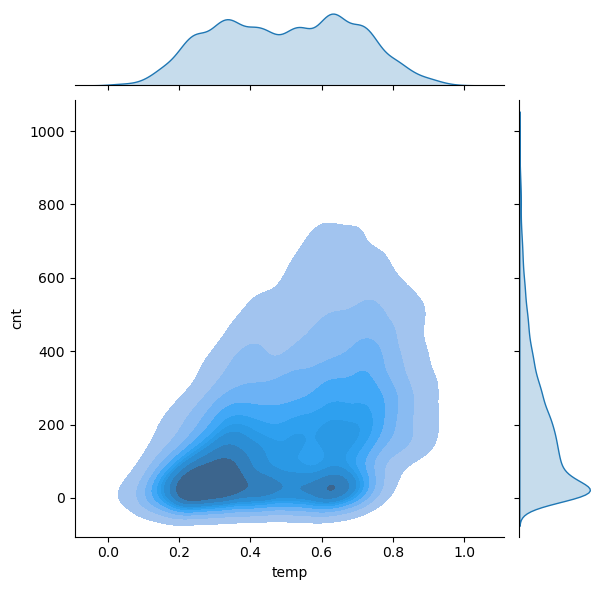

In [90]:
sns.jointplot(data=df, x='temp', y='cnt', kind='kde', fill=True)
plt.show()

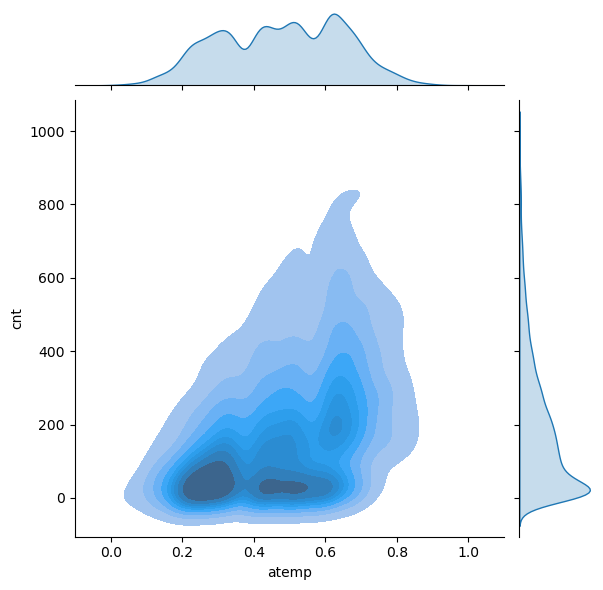

In [89]:
sns.jointplot(data=df, x='atemp', y='cnt', kind='kde', fill=True)
plt.show()

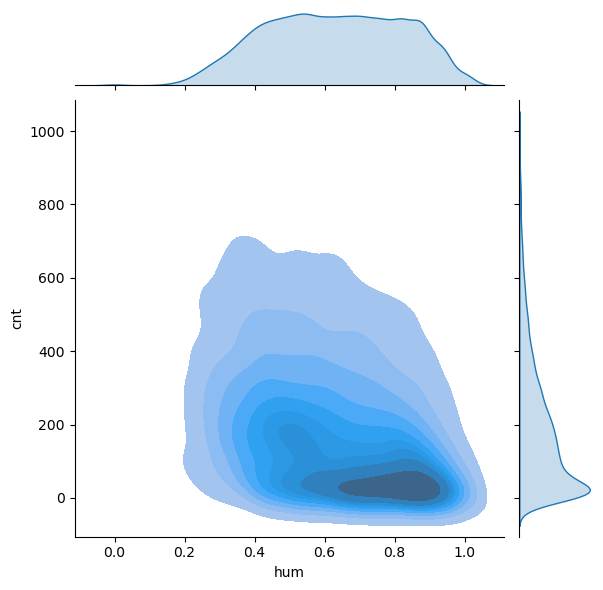

In [91]:
sns.jointplot(data=df, x='hum', y='cnt', kind='kde', fill=True)
plt.show()

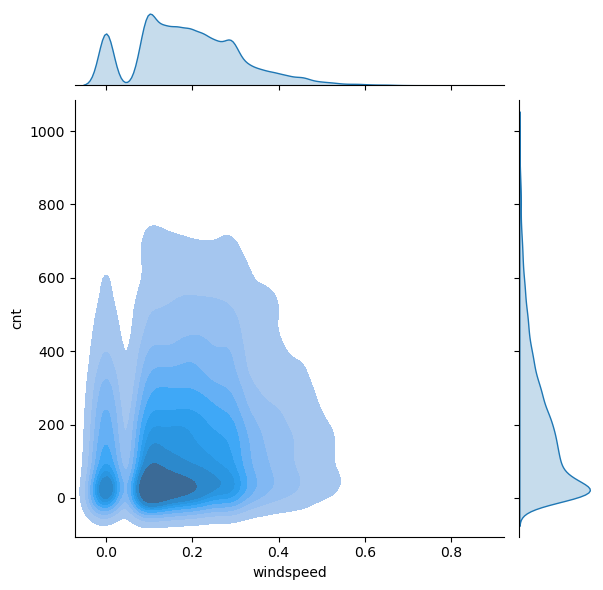

In [92]:
sns.jointplot(data=df, x='windspeed', y='cnt', kind='kde', fill=True)
plt.show()

No one rents when it's windy.

From the following plots we can retrieve the underlying linear relation between temperature-users and humidity-users.
For istance, humidity and the numer of users denote an inverse linear relationship.

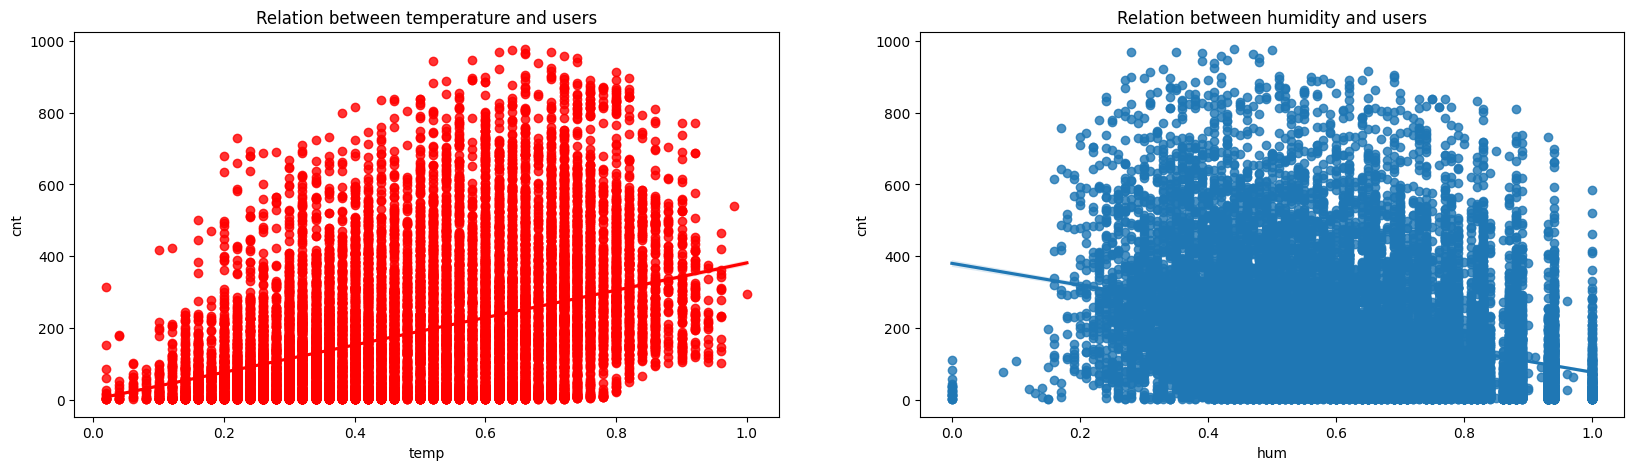

In [10]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.regplot(x=df['temp'], y=df['cnt'], ax=ax1 ,color='red')
ax1.set(title="Relation between temperature and users")
sns.regplot(x=df['hum'], y=df['cnt'], ax=ax2)
ax2.set(title="Relation between humidity and users")
plt.show()

Let analyze how the number of users change throughout the day with respect seasons and weekends.

From this initial plot we can retrive some important insights and determine different types of users.

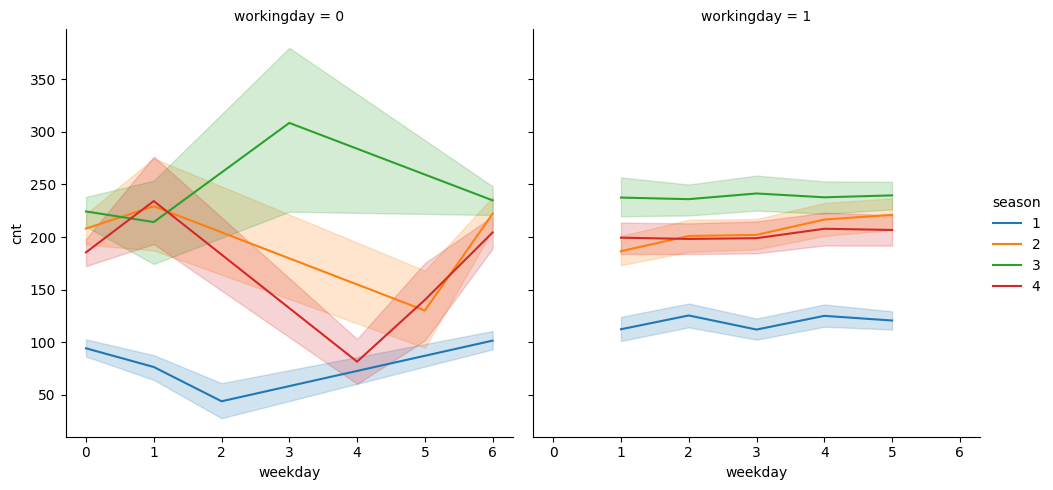

In [11]:
sns.relplot(data=df, x='weekday', y='cnt', hue='season', col='workingday', kind='line')

During workingdays the usage is pretty similar across all seasons.
As regards weekends, users show different behaviours according to the different seasons 

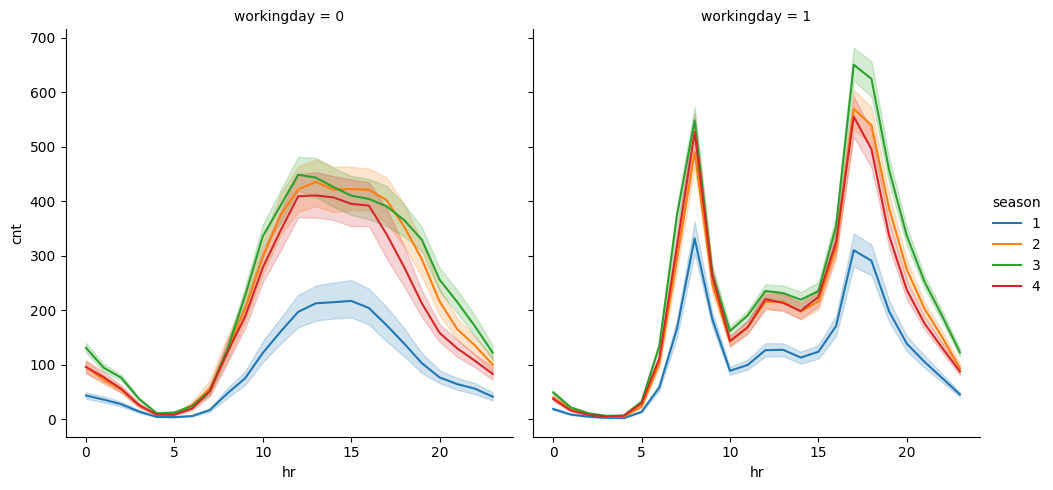

In [12]:
sns.relplot(data=df, x='hr', y='cnt', hue='season', col='workingday', kind='line')

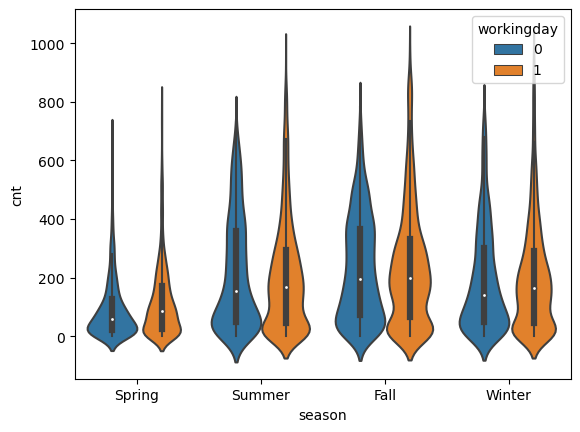

In [102]:
sns.violinplot(data=df, x='season', y='cnt', hue='workingday')
plt.xticks([0,1, 2, 3], ['Spring', 'Summer', 'Fall','Winter']) 
plt.show()

On average, more bikes are used during workingdays, except in Spring.
This analysis might suggest the Business that it should be focusing more on the development of a better tailored services for workes, since we may infer they are the principal users of the service

### A deeper look into Users Composition



The average number of bikes rented is about 189. There are some cases where the number of bikes rented is way way higher (outliers).
It might be due to particular reasons: holidays, particularly good weather, traffic.


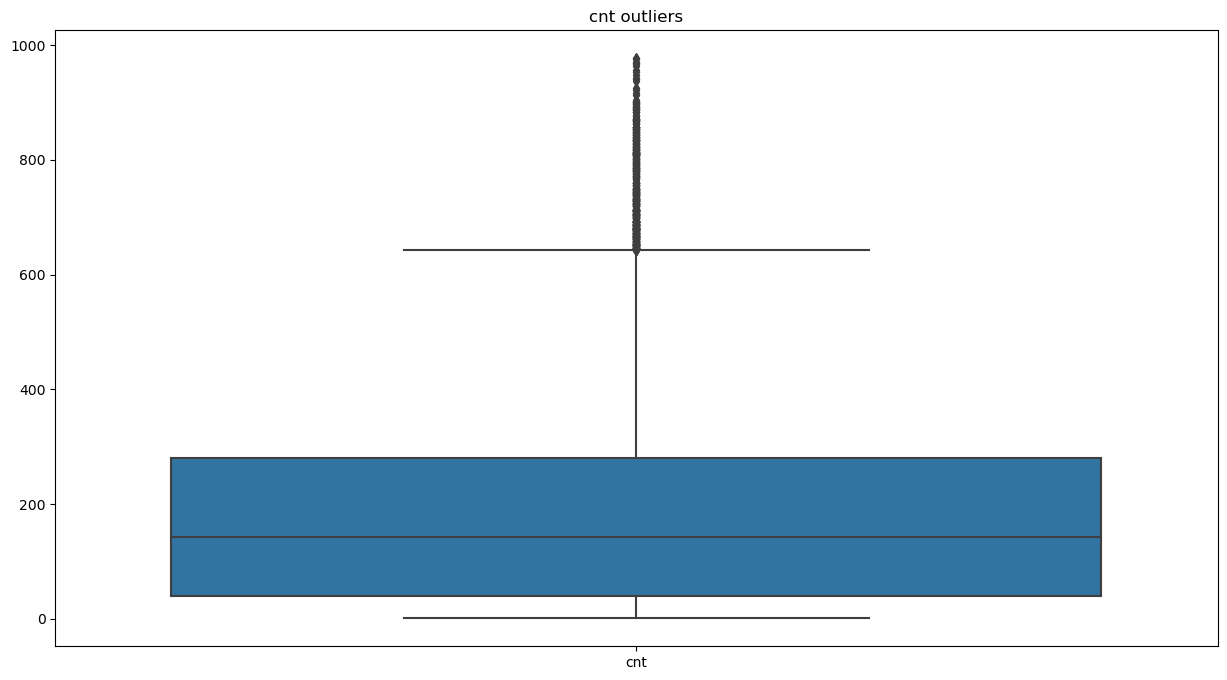

In [111]:
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=df[['cnt']])
ax.set_title('cnt outliers')
plt.show()

Business has improved from first to second year.
The improvement might be due to marketing, new feature in the service, new bikelanes et cetera. 

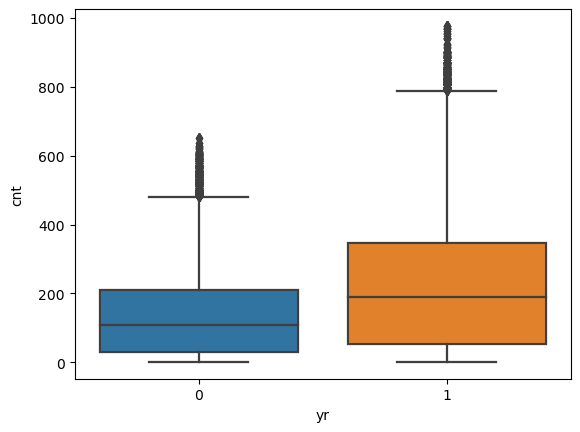

In [114]:
sns.boxplot(data=df, x='yr', y='cnt')
plt.show()

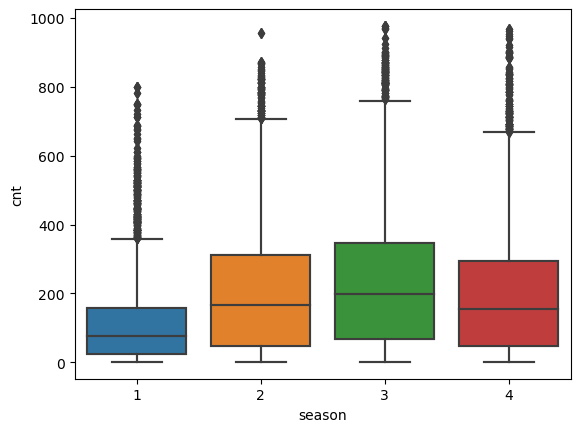

In [116]:
sns.boxplot(data=df, x='season', y='cnt')
# Less users in spring

plt.show()

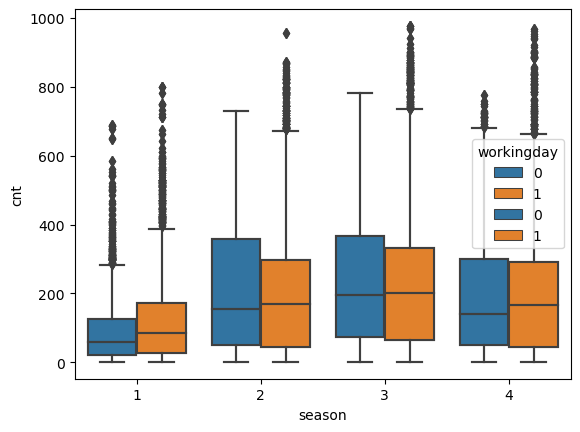

In [118]:
sns.boxplot(data=df, x=df.season, y='cnt', hue='workingday')
plt.show()
# The higher number of users in summer and fall might be due workers

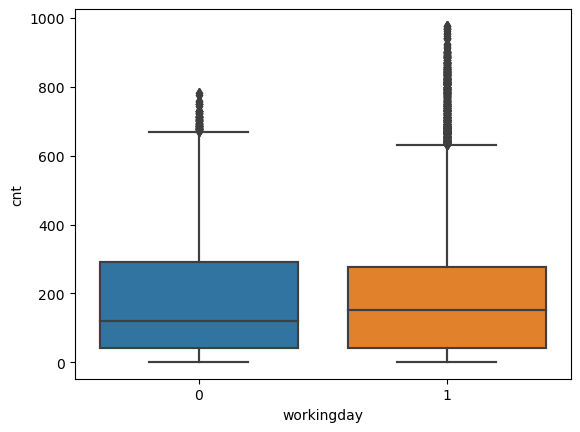

In [120]:
sns.boxplot(data=df, x='workingday', y='cnt')
plt.show()
#It seems that during working days we got a higher number of users

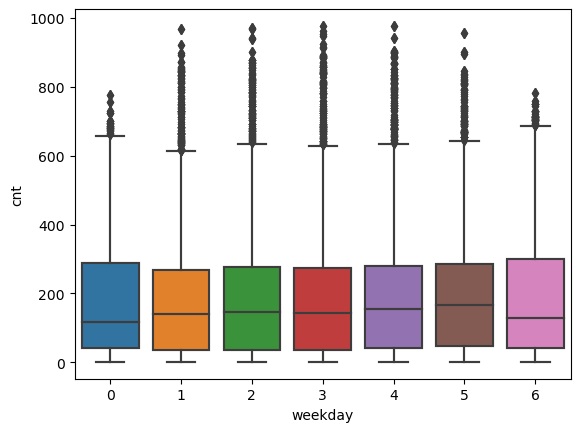

In [122]:
sns.boxplot(data=df, x='weekday', y='cnt')
plt.show()
# On average the number of bike during the week is larger than the one in the weekend
# And more outliers

_How the usage is spread accross the week and days_


[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

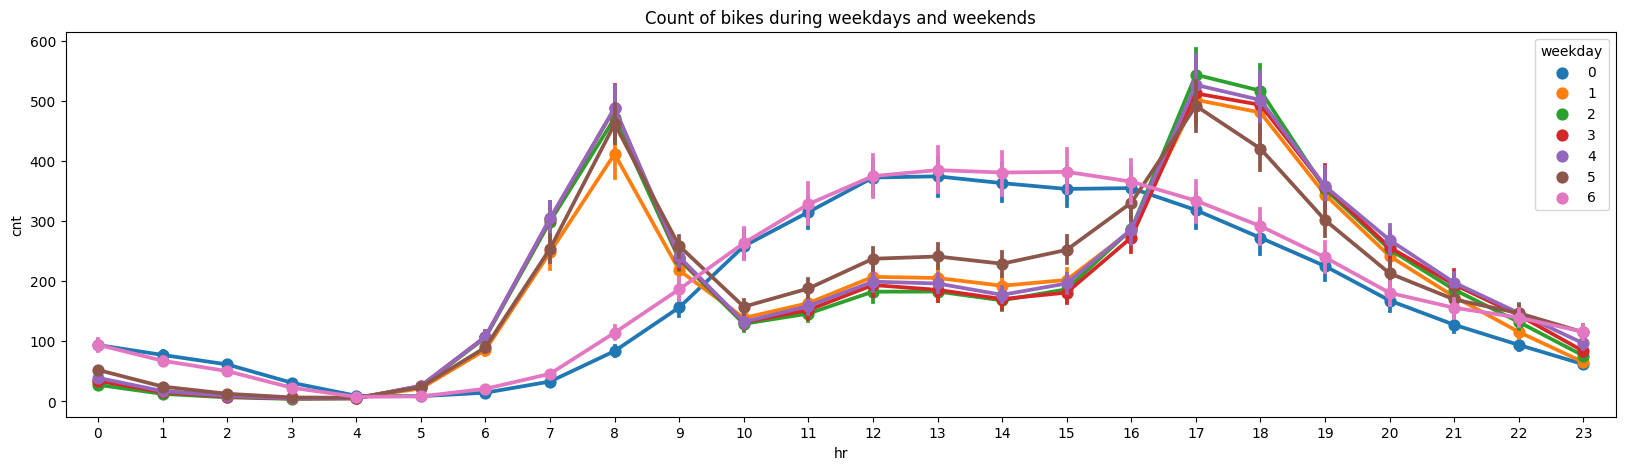

In [13]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hr', y='cnt', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

Unregistered users are more during the weekend (days 0 and 6) and spread accross the whole day (hr: 8-19)

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Unregistered users')]

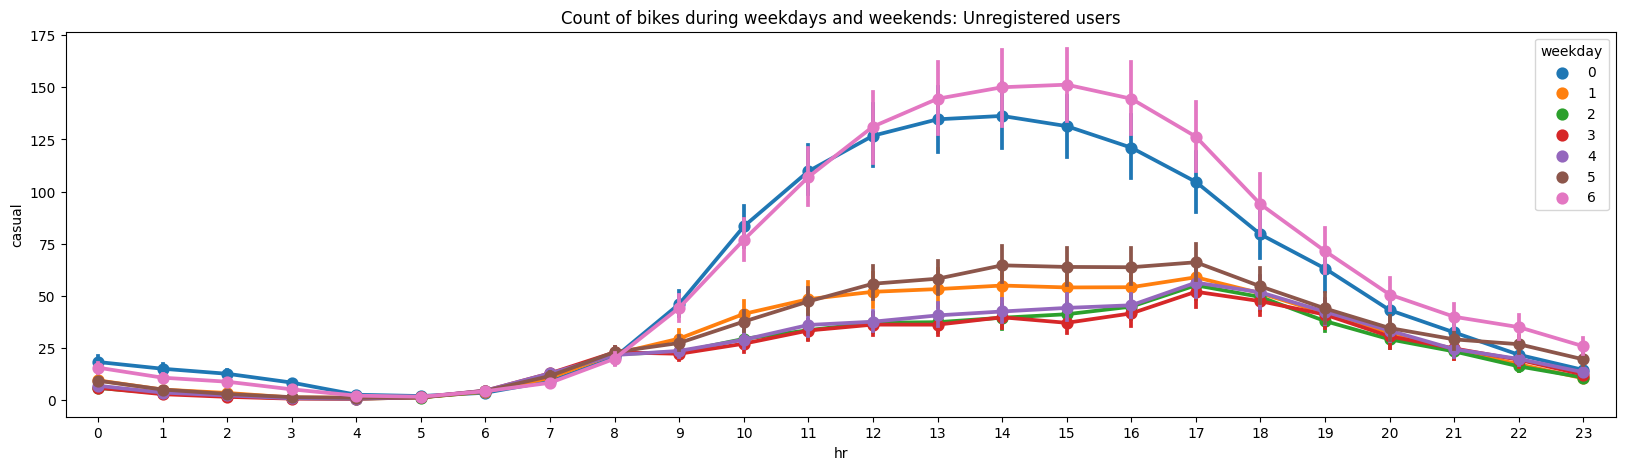

In [14]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hr', y='casual', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Unregistered users')

During workingdays (days: 1,2,3,4,5) we got peaks of registered users. Since the peaks are located in early morning and late afternoon, the users are likely to be workers renting bikes to get to work 

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Registered users')]

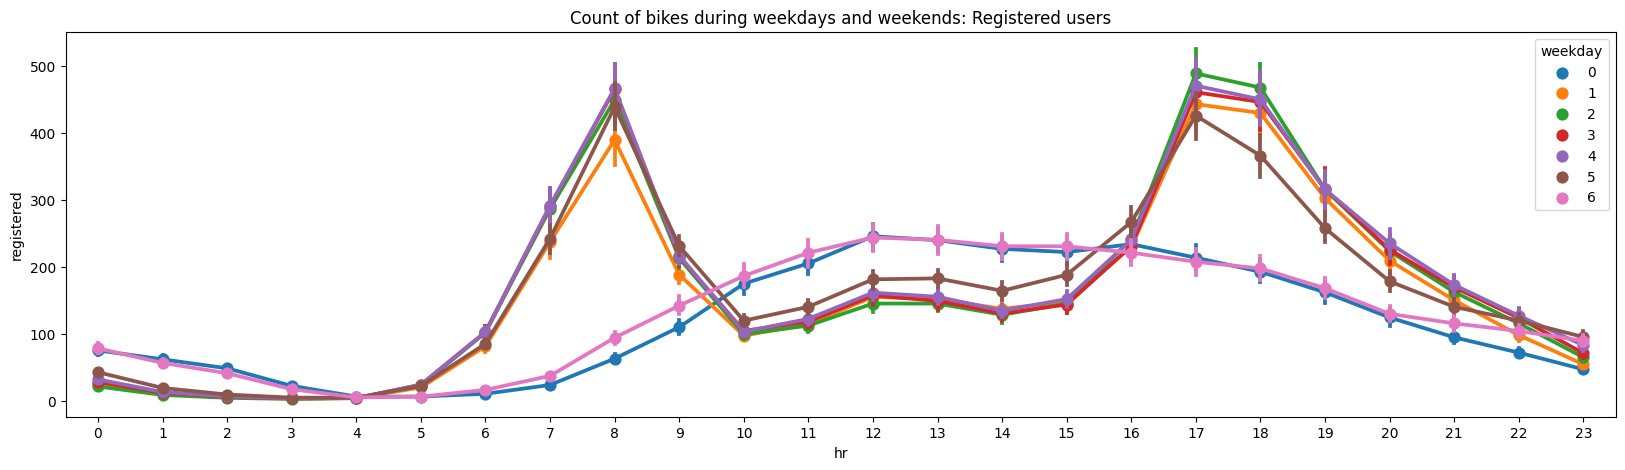

In [15]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hr', y='registered', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Registered users')

[Text(0.5, 1.0, 'Monthly count of bikes during weekdays and weekends')]

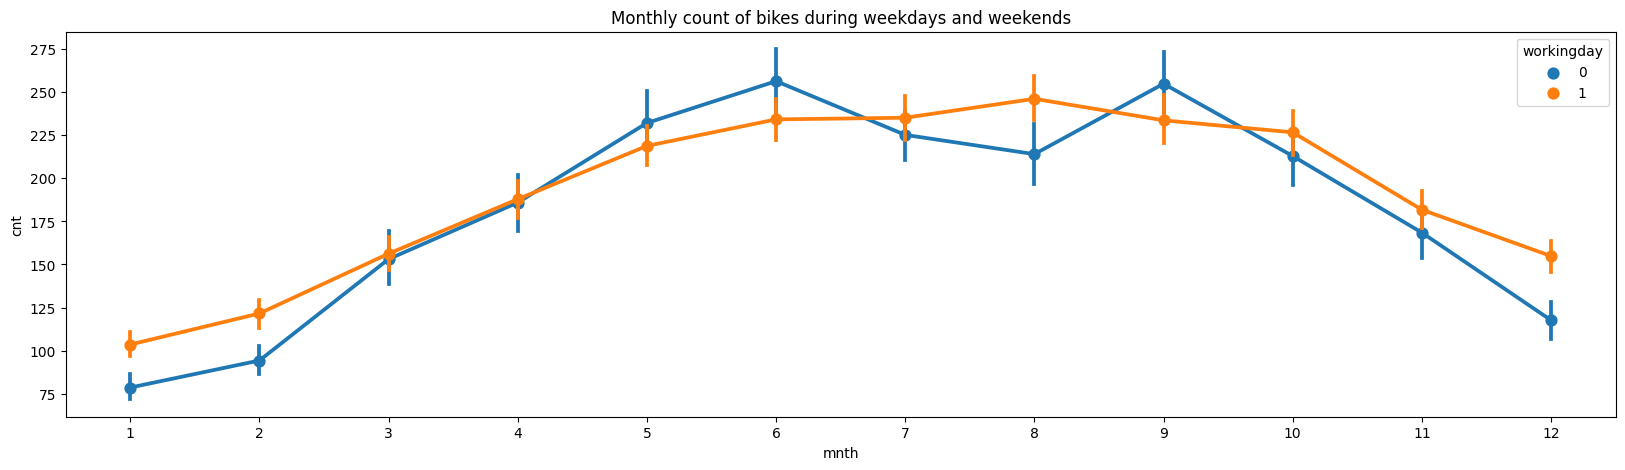

In [16]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='mnth', y='cnt', hue='workingday', ax=ax)
ax.set(title='Monthly count of bikes during weekdays and weekends')

### Coorelation Matrix

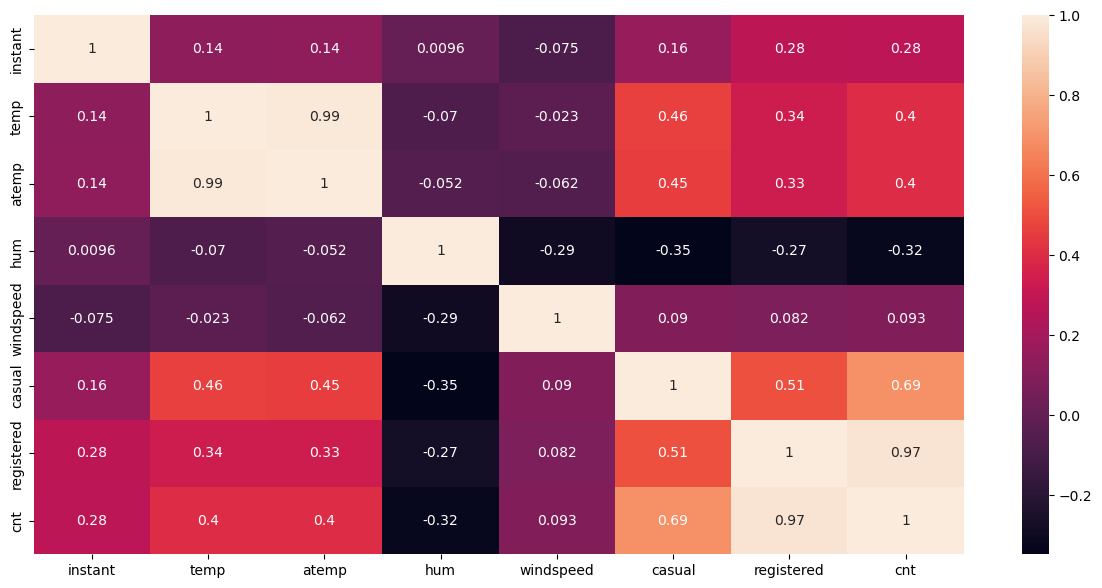

In [139]:
corr = df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, annot_kws={'size':10})
plt.show()

From this correlation matrix we can observe how humidity is **negatively correlated** with the target _cnt_. It means that the higher the humidity the fewer bikes are going to be rented.

Whereas temperature and perceived temperature are **positively correlated** with the target.

Casual and registered also show a really high correlation with the target, that is because _cnt_ is the sum of the latters.


# Supervised Training <a class="anchor" id="supervised"></a>

### Importing libraries

In [7]:
from sklearn import model_selection, preprocessing, model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import BaseEstimator

### Data Preprocessing

The columns *instant* *yr* and *dteday* will be dropped because they not useful in the training.

*atemp*, *holiday*, *casual*, *registered* are redundant of other columns.

In [8]:
#dropping columns
bikes = df.drop(columns=['instant', 'dteday', 'yr','atemp','holiday','casual','registered'])
bikes.head()

season  mnth  hr  weekday  workingday  weathersit  temp   hum  windspeed  \
0       1     1   0        6           0           1  0.24  0.81        0.0   
1       1     1   1        6           0           1  0.22  0.80        0.0   
2       1     1   2        6           0           1  0.22  0.80        0.0   
3       1     1   3        6           0           1  0.24  0.75        0.0   
4       1     1   4        6           0           1  0.24  0.75        0.0   

   cnt  
0   16  
1   40  
2   32  
3   13  
4    1

**Creating Dummy variables**

Creating dummy variables is useful when working with categorical variables, as most models are designed to work with numerical data. Dummy variables allow us to encode categorical variables in a numerical format that the model can understand, while still preserving the information and meaning of the original categorical data.

In [9]:
#as we have categorcial data, we will need dummy variables "one hot encoding"

df_oh = bikes

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['season','mnth','hr','weekday','workingday','weathersit']



for col in cols:
    df_oh = one_hot_encoding(df_oh, col)



In [10]:
df_oh

temp   hum  windspeed  cnt  season_2  season_3  season_4  mnth_2  \
0      0.24  0.81     0.0000   16         0         0         0       0   
1      0.22  0.80     0.0000   40         0         0         0       0   
2      0.22  0.80     0.0000   32         0         0         0       0   
3      0.24  0.75     0.0000   13         0         0         0       0   
4      0.24  0.75     0.0000    1         0         0         0       0   
...     ...   ...        ...  ...       ...       ...       ...     ...   
17374  0.26  0.60     0.1642  119         0         0         0       0   
17375  0.26  0.60     0.1642   89         0         0         0       0   
17376  0.26  0.60     0.1642   90         0         0         0       0   
17377  0.26  0.56     0.1343   61         0         0         0       0   
17378  0.26  0.65     0.1343   49         0         0         0       0   

       mnth_3  mnth_4  ...  weekday_1  weekday_2  weekday_3  weekday_4  \
0           0       0  ...          0          0          0          0   
1           0       0  ...          0          0          0          0   
2           0       0  ...          0          0          0          0   
3           0       0  ...          0          0          0          0   
4           0       0  ...          0          0          0          0   
...       ...     ...  ...        ...        ...        ...        ...   
17374       0       0  ...          1          0          0          0   
17375       0       0  ...          1          0          0          0   
17376       0       0  ...          1          0          0          0   
17377       0       0  ...          1          0          0          0   
17378       0       0  ...          1          0          0          0   

       weekday_5  weekday_6  workingday_1  weathersit_2  weathersit_3  \
0              0          1             0             0             0   
1              0          1             0             0             0   
2              0          1             0             0             0   
3              0          1             0             0             0   
4              0          1             0             0             0   
...          ...        ...           ...           ...           ...   
17374          0          0             1             1             0   
17375          0          0             1             1             0   
17376          0          0             1             0             0   
17377          0          0             1             0             0   
17378          0          0             1             0             0   

       weathersit_4  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
17374             0  
17375             0  
17376             0  
17377             0  
17378             0  

[17379 rows x 51 columns]

**Scaling and Splitting the data**

Our data set will be splitted into *Training*, *Validation*, and *Testing*.

The *Trinaing* Dataset will be used to train all the models. 

The *Validation* Dataset will be used to initially test the models. 

The *Testing* Dataset will only be used with the model with best performance and optimization.

In [11]:
# Setting the splitting ration 
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

#setting X and y
X = df_oh.drop(columns=['cnt'])
y = df_oh['cnt']

# Create the scaler
scaler = MinMaxScaler()

# Fit the scaler to the data
scaler.fit(X)

# Transform the data
X_scaled = scaler.transform(X)

# Transform the target variable using the log function
y_transformed = np.log(y)


# train is now 75% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_transformed, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print('Size of x_train:',len(x_train),'| y_train:', len(y_train))
print('Size of x_val:',len(x_val),'| y_val:', len(y_val))
print('Size of x_test:',len(x_test),'| y_test:', len(y_test))



Size of x_train: 13034 | y_train: 13034
Size of x_val: 2607 | y_val: 2607
Size of x_test: 1738 | y_test: 1738


<font size="4">**The supervised training models that will be use:**</font>

 1. Linear Models: 
     - Linear Regression 
     - Ridge Regression
 1. Ensemble Modles: 
     - Random Forest Regressor
     - Extra Trees Regressor
 1. Support vector machines (SVM) 
 1. k-nearest neighbors (k-NN)


At the end, the results of all models will be compared and the best model will be optimized and tested with the test partion of the dataset

## Linear Models  <a class="anchor" id="liner_models"></a>

### Linear Regression  <a class="anchor" id="linear"></a>

we will run a linear regression model with the default settings, and evaluate it using the mean squared error (MSE), the mean absolute error (MAE), and the coefficient of determination (R^2). The MSE is a measure of the average squared difference between the predicted and the true values, the MAE is a measure of the average absolute difference between the predicted and the true values, and R^2 is a measure of how well the model fits the data.

In [145]:
# Create the model
lr_model = LinearRegression()

# Fit the model to the data
lr_model.fit(x_train, y_train)

# Make predictions on new data
lr_predictions = lr_model.predict(x_val)

# Calculate the MSE, MAE, and R^2 score
lr_mse = mean_squared_error(y_val, lr_predictions)
lr_mae = mean_absolute_error(y_val, lr_predictions)
lr_r2 = r2_score(y_val, lr_predictions)

print(f'MSE: {lr_mse:.2f}')
print(f'MAE: {lr_mae:.2f}')
print(f'R^2: {lr_r2:.2f}')


MSE: 0.46
MAE: 0.51
R^2: 0.79


To visualize our our results, we will use a scatter plot between the predicted values and the correct ones

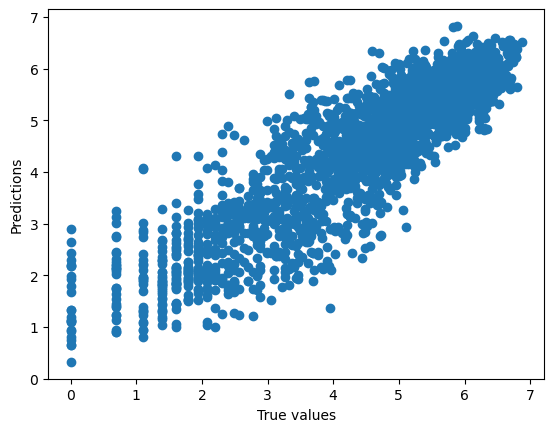

In [146]:
# Plot the predictions and the true values
plt.scatter(y_val, lr_predictions)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

lets also see a histogram of the error

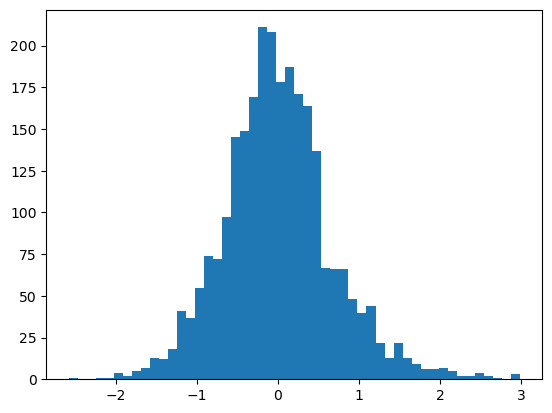

In [152]:
# Calculate the errors
lr_errors = lr_predictions - y_val

# Plot the distribution of the errors
plt.hist(lr_errors, bins=50)
plt.show()


### Ridge <a class="anchor" id="ridge"></a>

we will run a Ridge regression model with the default settings, and evaluate it using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared.

In [153]:
# Create the model
rd_model = Ridge()

# Fit the model to the data
rd_model.fit(x_train, y_train)

# Make predictions on validation data
rd_predictions = rd_model.predict(x_val)

# Calculate the MSE, MAE, and R^2 score
rd_mse = mean_squared_error(y_val, rd_predictions)
rd_mae = mean_absolute_error(y_val, rd_predictions)
rd_r2 = r2_score(y_val, rd_predictions)

print(f'MSE: {rd_mse:.2f}')
print(f'MAE: {rd_mae:.2f}')
print(f'R^2: {rd_r2:.2f}')


MSE: 0.46
MAE: 0.51
R^2: 0.79


To visualize our our results, we will use a scatter plot between the predicted values and the correct ones

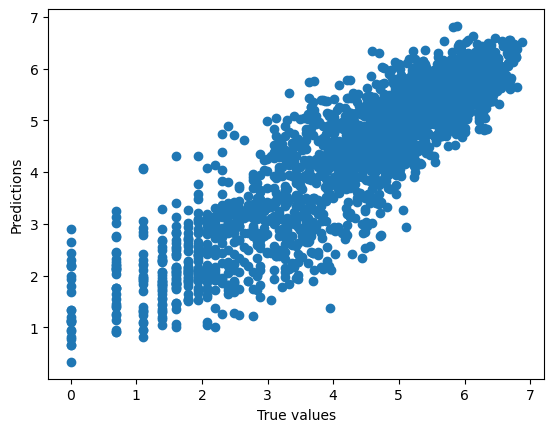

In [154]:
# Plot the predictions and the true values
plt.scatter(y_val, rd_predictions)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

lets also see a histogram of the error

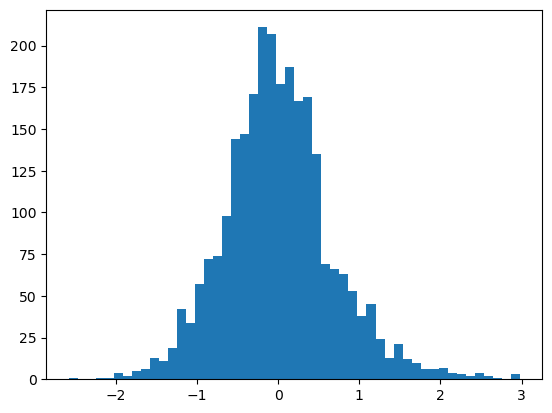

In [155]:
# Calculate the errors
rd_errors = rd_predictions - y_val

# Plot the distribution of the errors
plt.hist(rd_errors, bins=50)
plt.show()


Since we got very similar results with two linear models, will move forward to Ensembeled Modles.

## Ensemble Modles  <a class="anchor" id="ensemble-models"></a>

### Random Forest  <a class="anchor" id="random"></a>

Random Forest is an ensemble model that combines the predictions of multiple decision trees trained on different subsets of the data. 


**create a parameter grid to sample from during fitting**



In [12]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 5 and 3 respectively). More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time. Machine learning is a field of trade-offs, and performance vs time is one of the most fundamental trade-offs we will need to do. 

Later on if we find that the best results come from the Random Forest, we will increase the number of iteration to find the best parameters.

In [14]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=0, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42)

Here we can see the best parameters and the best score

In [161]:
print(f'Best parameters: {rf_random.best_params_}')
print(f'Best score: {rf_random.best_score_}')

Best parameters: {'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
Best score: 0.8704849352778935




The below code trains a random forest regressor using the best parameters found by the grid search, then makes predictions on the validation data and calculates the mean squared error (MSE), the mean absolute error (MAE), and the coefficient of determination (R^2).

In [15]:
# Train the model using the best parameters
rf_model = RandomForestRegressor(**rf_random.best_params_)
rf_model.fit(x_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(x_val)




In [163]:
# Calculate the evaluation metrics
rf_mse = mean_squared_error(y_val, rf_y_pred)
rf_mae = mean_absolute_error(y_val, rf_y_pred)
rf_r2 = r2_score(y_val, rf_y_pred)

# Print the results
print(f'MSE: {rf_mse:.2f}')
print(f'MAE: {rf_mae:.2f}')
print(f'R^2: {rf_r2:.2f}')

MSE: 0.28
MAE: 0.39
R^2: 0.87


Based on the above evaluation metrics (MSE: 0.28, MAE: 0.39, R^2: 0.87), it looks like the model is able to make relatively accurate predictions on the validation data.



We can use matplotlib to plot the predictions made by our random forest regressor on the test set:

This code plots the predicted values on the y-axis and the true values on the x-axis, so a perfect model would have a diagonal line of points. 

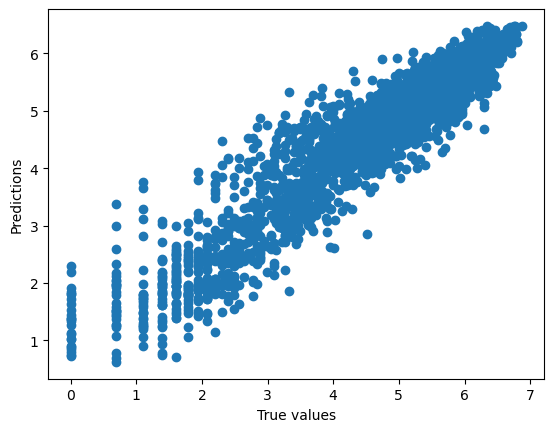

In [164]:
# Plot the predictions and the true values
plt.scatter(y_val, rf_y_pred)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()


We can also use matplotlib to plot the distribution of the errors:

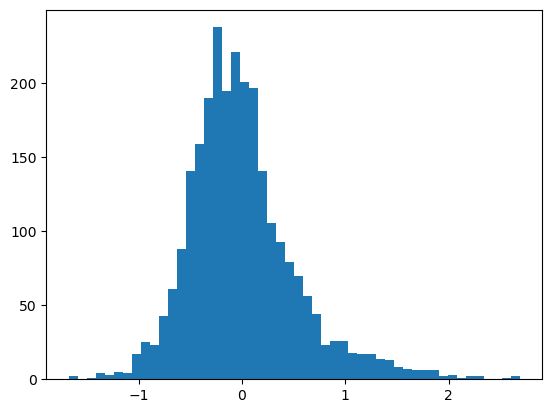

In [165]:
# Calculate the errors
rf_errors = rf_y_pred - y_val

# Plot the distribution of the errors
plt.hist(rf_errors, bins=50)
plt.show()


### Extra Trees Regressor <a class="anchor" id="extra"></a>

Extra Trees Regressor (also known as Extremely Randomized Trees Regressor) is an ensemble learning algorithm that is used for regression tasks. It is a type of decision tree algorithm that builds a forest of decision trees and averages the predictions of the individual trees to make a final prediction.

The same random grid that was used in the Random Forest Model will be used now to determine the best parameters for our model.

In [16]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
et = ExtraTreesRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations, and use all available cores
et_random = RandomizedSearchCV(estimator = et, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=0, random_state=42, n_jobs = -1)
# Fit the random search model
et_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42)

Here we can see the best parameters and the best score

In [167]:
print(f'Best parameters: {et_random.best_params_}')
print(f'Best score: {et_random.best_score_}')

Best parameters: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': False}
Best score: 0.90122357254087


The below code trains an Extra Tress Regression Model using the best parameters found by the grid search, then makes predictions on the validation data and calculates the mean squared error (MSE), the mean absolute error (MAE), and the coefficient of determination (R^2).

In [168]:
# Train the model using the best parameters
et_model = ExtraTreesRegressor(**et_random.best_params_)
et_model.fit(x_train, y_train)

# Make predictions
et_y_pred = et_model.predict(x_val)


In [169]:
# Calculate the evaluation metrics
et_mse = mean_squared_error(y_val, et_y_pred)
et_mae = mean_absolute_error(y_val, et_y_pred)
et_r2 = r2_score(y_val, et_y_pred)

# Print the results
print(f'MSE: {et_mse:.2f}')
print(f'MAE: {et_mae:.2f}')
print(f'R^2: {et_r2:.2f}')

MSE: 0.22
MAE: 0.34
R^2: 0.90


Based on the above evaluation metrics (MSE: 0.22, MAE: 0.34, R^2: 0.90), it looks like the model is able to make relatively accurate predictions and it is the best one so far.



We can use matplotlib to plot the predictions made by our random forest regressor on the test set:

This code plots the predicted values on the y-axis and the true values on the x-axis, so a perfect model would have a diagonal line of points. 

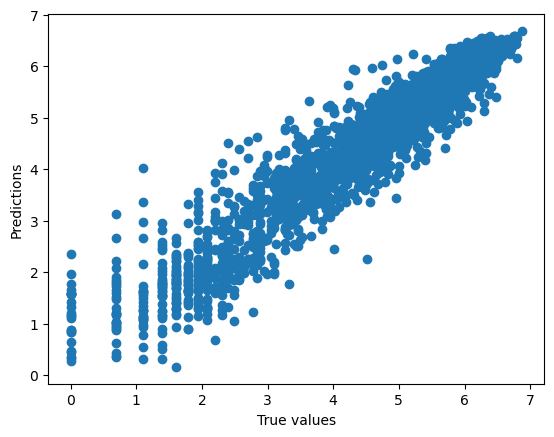

In [170]:
# Plot the predictions and the true values
plt.scatter(y_val, et_y_pred)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()


We can also use matplotlib to plot the distribution of the errors:

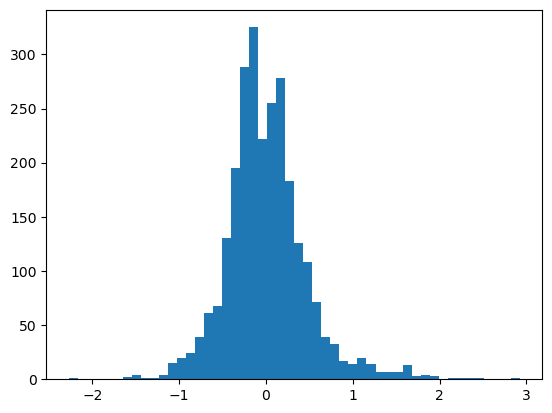

In [171]:
# Calculate the errors
et_errors = et_y_pred - y_val

# Plot the distribution of the errors
plt.hist(et_errors, bins=50)
plt.show()


## Support vector machines (SVMs)  <a class="anchor" id="svm"></a>

SVMs are a type of supervised learning model that can be used for both classification and regression tasks. 

For a regression task such as predicting the number of users of the bike sharing app on an hour, we would use a support vector machine regressor (SVR) rather than a support vector machine classifier (SVC). The SVR model tries to find the hyperplane in a high-dimensional space that best fits the data and minimizes the prediction error.

Keeping in mind that there are many factors that can influence the number of users of the app on an hour, and it may be challenging to accurately predict this quantity. We will need to experiment with different features and models to find the one that works best for your data.



The below colde evaluate the performance of the SVR model with the best parameters found by the grid search:

In [17]:
# Define the parameter grid  "Without poly to save time" 
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}

# Create the SVR model
svr = SVR()

# Create the grid search object
#svr_grid_search = GridSearchCV(model, param_grid,  cv=5, scoring='neg_mean_squared_error')
svr_random = RandomizedSearchCV(estimator = svr, param_distributions = param_grid, n_iter = 5, cv = 3, verbose=0, random_state=42, n_jobs = -1)


# Fit the grid search object to the data
svr_random.fit(x_train, y_train)

# Print the best parameters
print(svr_random.best_params_)


{'kernel': 'rbf', 'gamma': 0.1, 'C': 0.1}


Now we train a new SVR model with the best combination of parameters found by the grid search, and then uses the model to make predictions on the validation set.

In [173]:
# Get the best parameters from the grid search
svr_best_params = svr_random.best_params_

# Train the SVR model with the best parameters
svr_model = SVR(**svr_best_params)
svr_model.fit(x_train, y_train)

# Make predictions on the test set
svr_y_pred = svr_model.predict(x_val)

# Calculate the evaluation metrics
svr_mse = mean_squared_error(y_val, svr_y_pred)
svr_mae = mean_absolute_error(y_val, svr_y_pred)
svr_r2 = r2_score(y_val, svr_y_pred)

# Print the results
print(f'MSE: {svr_mse:.2f}')
print(f'MAE: {svr_mae:.2f}')
print(f'R^2: {svr_r2:.2f}')


MSE: 0.38
MAE: 0.45
R^2: 0.83


This code creates an SVR model with a radial basis function (RBF) kernel, which is a common choice for regression tasks. It then trains the model on the training set using the fit method and makes predictions on the test set using the predict method. Finally, it calculates and prints the evaluation metrics (MSE, MAE, and R^2) on





**using matplotlib to plot the predictions made by an SVR model on the validation set**

This code plots the predicted values on the y-axis and the true values on the x-axis, the straighter the line the better our model worked.

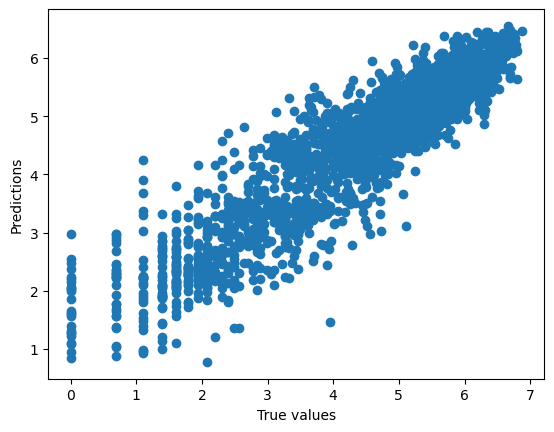

In [174]:
# Plot the predictions and the true values
plt.scatter(y_val, svr_y_pred)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()


We can also use matplotlib to plot the distribution of the errors:

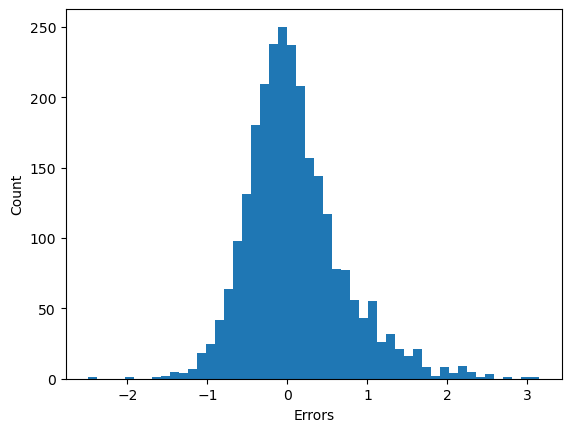

In [175]:
# Calculate the errors
svr_errors = svr_y_pred - y_val

# Plot the distribution of the errors
plt.hist(svr_errors, bins=50)
plt.xlabel('Errors')
plt.ylabel('Count')
plt.show()


## k-nearest neighbors (k-NN)   <a class="anchor" id="knn"></a>

K-Nearest Neighbors (K-NN) is a supervised learning algorithm that is used for both classification and regression tasks. It is a non-parametric method that stores all the training data and makes predictions based on the similarity of the input data to the stored training examples.

In the K-NN algorithm, the number of nearest neighbors (K) is a hyperparameter that specifies the number of training examples that are used to make the predictions. For regression tasks, the predicted value is the average of the K nearest neighbors.

We will use K-NN for regression using the KNeighborsRegressor class from the sklearn.neighbors module.



In [176]:
# Define the parameter grid
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}

# Create the k-NN regressor
knn_model = KNeighborsRegressor()

# Create the grid search object
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search object to the data
knn_grid_search.fit(x_train, y_train)

# Get the best parameters from the grid search
knn_best_params = knn_grid_search.best_params_

print(knn_best_params)

{'n_neighbors': 5, 'weights': 'distance'}


Now that we have the best parameters, we can start training our model.

In [177]:
# Train the k-NN regressor with the best parameters
knn_model = KNeighborsRegressor(**knn_best_params)
knn_model.fit(x_train, y_train)

# Make predictions on the validation set
knn_y_pred = knn_model.predict(x_val)

# Calculate the evaluation metrics
knn_mse = mean_squared_error(y_val, knn_y_pred)
knn_mae = mean_absolute_error(y_val, knn_y_pred)
knn_r2 = r2_score(y_val, knn_y_pred)

# Print the results
print(f'MSE: {knn_mse:.2f}')
print(f'MAE: {knn_mae:.2f}')
print(f'R^2: {knn_r2:.2f}')

MSE: 0.36
MAE: 0.45
R^2: 0.84


Now we plot those results:

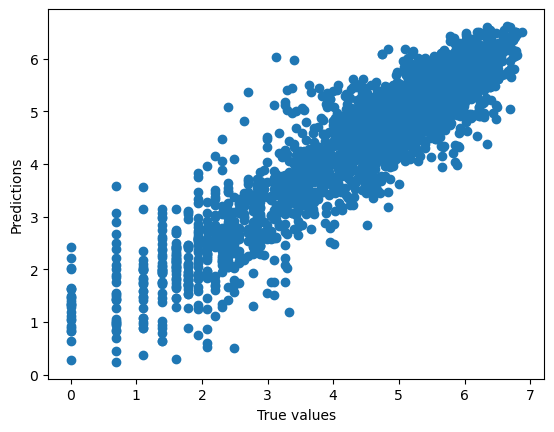

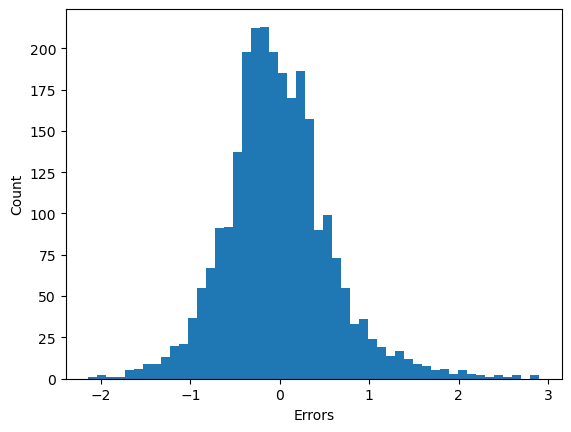

In [178]:
# Plot the predictions and the true values
plt.scatter(y_val, knn_y_pred)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

# Calculate the errors
knn_errors = knn_y_pred - y_val

# Plot the distribution of the errors
plt.hist(knn_errors, bins=50)
plt.xlabel('Errors')
plt.ylabel('Count')
plt.show()

### Models Comparison

In [179]:
from IPython.display import HTML, display

data = [["Linear Regression",format(lr_mse, '.2f'),format(lr_mae, '.2f'),format(lr_r2, '.2f')],
        ["Ridge Regression",format(rd_mse, '.2f'),format(rd_mae, '.2f'),format(rd_r2, '.2f')],
        ["Random Forest Regressor",format(rf_mse, '.2f'),format(rf_mae, '.2f'),format(rf_r2, '.2f')],
        ["Extra Trees Regressor",format(et_mse, '.2f'),format(et_mae, '.2f'),format(et_r2, '.2f')],
        ["Support vector machines (SVM)",format(svr_mse, '.2f'),format(svr_mae, '.2f'),format(svr_r2, '.2f')], 
        ["k-nearest neighbors (k-NN)",format(knn_mse, '.2f'),format(knn_mae, '.2f'),format(knn_r2, '.2f')], 

        ]

display(HTML(
   '<table><tr><th style="text-align: justify;">Model</th><th>MSE</th><th>MAE</th><th>R^2</th></tr><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td style="text-align: justify;">{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
       )
))




## Testing The Best Model  <a class="anchor" id="testing"></a>

As we can see in the table, the Extra Tree Regressor achived the best results, now we will fine tune the hyperparameters more and run the model on the test data dataset which is considered a fresh real world data 

In [18]:
# Runnin Random Search CV with more iteration to find possible better combinations
et2 = ExtraTreesRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
et2_random = RandomizedSearchCV(estimator = et2, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=0, random_state=42, n_jobs = -1)
# Fit the random search model
et2_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42)

In [227]:
print(f'Best parameters: {et2_random.best_params_}')
print(f'Best score: {et2_random.best_score_}')

Best parameters: {'n_estimators': 1200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}
Best score: 0.8991131724874571


Now we train the model with the new parameters and test it on the test set

In [20]:
# Train the model using the new best parameters
et2_model = ExtraTreesRegressor(**et2_random.best_params_)
et2_model.fit(x_train, y_train)

# Make predictions
et2_y_pred = et2_model.predict(x_test)


Evaluating the prediction:

In [21]:
# Calculate the evaluation metrics
et2_mse = mean_squared_error(y_test, et2_y_pred)
et2_mae = mean_absolute_error(y_test, et2_y_pred)
et2_r2 = r2_score(y_test, et2_y_pred)



In [230]:
# Print the results
print(f'MSE: {et2_mse:.2f}')
print(f'MAE: {et2_mae:.2f}')
print(f'R^2: {et2_r2:.2f}')

MSE: 0.10
MAE: 0.22
R^2: 0.95


As we can see, after the fine-tuning the parameters, the model performs much better and outputs excellent results.

# Unsupervised Learning <a class="anchor" id="unsuper"></a>

In unsupervised learning, a machine learning model is trained on a dataset without any labeled outcomes or responses. The goal of unsupervised learning is to find patterns or relationships within the data, rather than to predict specific outcomes. This can be done using techniques such as clustering, where the goal is to group similar data points together, or dimensionality reduction, where the goal is to reduce the number of features in the data while retaining as much information as possible. Unsupervised learning is often used for exploratory data analysis and can be a useful tool for discovering underlying structures in data.

- Principal Component Analysis (PCA) and Factor Analysis of Mixed Data (FAMD)
- Clustering:

    – Kmeans (using just quantitative variables)
    
    – Kmodes (using quantitative and qualitative variables)
    
    – Hierarchical clustering


## Principal Component Analysis (PCA) and Factor Analysis of Mixed Data (FAMD) <a class="anchor" id="pcafamd"></a>

Principal component analysis (PCA) is a statistical technique that is used to identify patterns in data and to reduce the dimensionality of the data by projecting it onto a lower-dimensional space. It is a type of linear transformation that rotates the data in such a way that the rotated data has the maximum variance. PCA is often used to reduce the complexity of the data and to identify the underlying structure of the data.

Factor Analysis of Mixed Data (FAMD) is a multivariate technique that is used to identify patterns in data that includes both continuous and categorical variables. It is similar to PCA, but it is specifically designed to handle mixed data types. FAMD is often used in the field of market research to identify underlying factors that influence consumer behavior.


### PCA <a class="anchor" id="pca"></a>

Considering the correlation matrix we have performed during the EDA, we can expect quite low results since variable seems to be not so correlated one each other.

To select the best number of principal components there are different methods that can be adopted, such as the elbow method visualizable with a _scree plot_ (in which the goal is to identify the presence of possible elbows in the graph) or the _Kaiser’s rule_ (where we should opt for the number of PCs where the eigenavalues are greater than 1).

In [1]:
%%capture

import sys
!{sys.executable} -m pip install kmodes
!{sys.executable} -m pip install prince

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import pylab

import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AffinityPropagation 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MiniBatchKMeans
from kmodes.kmodes import KModes
from prince import FAMD

In [2]:
df2 = pd.read_csv('hour.csv')

df_pca = df2.drop(['cnt','instant','dteday','season',
         'yr','mnth','hr','holiday','weekday',
         'workingday','weathersit'], 
          axis=1)


_Scaling_

One of the most important things to do before applying any unsupervised techniques is **scaling** the data. Moreover, feature scaling is essential for machine learning algorithms that calculate distances between data. If not scale, the feature with a higher value range starts dominating when calculating distances.

In [11]:
scaler = RobustScaler()
df_pca_scaled = scaler.fit_transform(df_pca)
df_pca_scaled = pd.DataFrame(df_pca_scaled, columns=df_pca.columns)

In [26]:
df_pca_scaled.head()

temp     atemp       hum  windspeed    casual  registered
0 -0.8125 -0.683918  0.600000  -1.300268 -0.318182   -0.548387
1 -0.8750 -0.736714  0.566667  -1.300268 -0.204545   -0.446237
2 -0.8750 -0.736714  0.566667  -1.300268 -0.272727   -0.473118
3 -0.8125 -0.683918  0.400000  -1.300268 -0.318182   -0.564516
4 -0.8125 -0.683918  0.400000  -1.300268 -0.386364   -0.612903

In [27]:
pca = PCA(n_components=3)
pca_performed = pca.fit_transform(df_pca_scaled)
PC_values = np.arange(pca.n_components_) + 1 #+1 so that the pc_values start from 1

_Scree Plot_

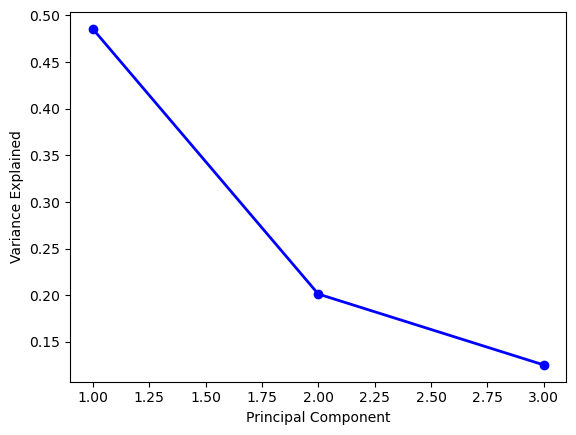

In [185]:
plt.plot(PC_values, pca.explained_variance_ratio_,'o-', linewidth=2,color='blue') 
#o- put the points in the line graph plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

The variance explained by the components is about 80%. The scree plot suggests that an optimal number of components may be 2.

In [186]:
sum(pca.explained_variance_ratio_)

0.8122084150395898

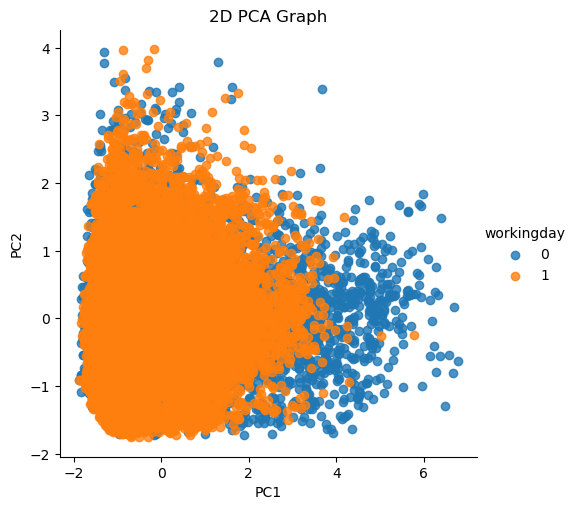

In [187]:
pca_df = pd.DataFrame(data = pca_performed[:, :2], columns = ['PC1', 'PC2'])
pca_visual = pd.concat([pca_df, df2['workingday']], axis = 1)
sns.lmplot(
x='PC1',
y='PC2', data=pca_visual, hue='workingday', fit_reg=False, legend=True
)
plt.title('2D PCA Graph')
plt.show()



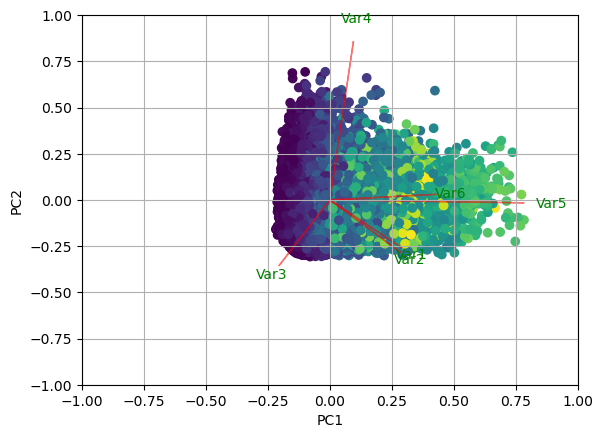

In [188]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pca_performed[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

_Kaiser's Rule_

In [189]:
#Let's see the eigenvalues

print(pca.explained_variance_)

[1.80734429 0.74940102 0.46644591]


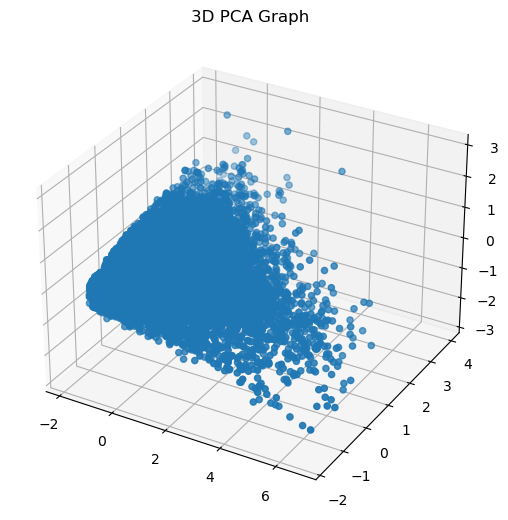

In [190]:
fig = pylab.figure()
ax = Axes3D(fig, auto_add_to_figure=False)

#auto_add_to_figure = False because otherwise it gives a warning

pca_df = pd.DataFrame(data = pca_performed[:, :3], columns = ['PC1','PC2','PC3'], )
pca_visual = pd.concat([pca_df, df2['workingday']], axis = 1, )
ax.scatter(pca_df.PC1, pca_df.PC2, pca_df.PC3)
fig.add_axes(ax) #suggested to write in this way by pylab itself (there was a warning before)
plt.title('3D PCA Graph')
plt.show()

### FAMD <a class="anchor" id="Famd"></a>

Now let’s have a look at the **Factor Analysis of Mixed Data (FAMD)**. Given the results obtained with the PCA, we do not expect to see improvements including also the categorical variables (worsening is much more likely).
Note: in FAMD rescaling of quantitative variables is performed automatically.

In [3]:
df2.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [4]:
df2.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Some data preprocessing before applying the FAMD algorithm

In [5]:
df_famd = df2.drop(['cnt','instant','dteday','temp','atemp','hum','windspeed'], axis=1)

cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in cols:
    df_famd[col] = df_famd[col].astype('object')   

In [6]:
df_famd.head()

season yr mnth hr holiday weekday workingday weathersit  casual  registered
0      1  0    1  0       0       6          0          1       3          13
1      1  0    1  1       0       6          0          1       8          32
2      1  0    1  2       0       6          0          1       5          27
3      1  0    1  3       0       6          0          1       3          10
4      1  0    1  4       0       6          0          1       0           1

In [7]:
df_famd.dtypes

season        object
yr            object
mnth          object
hr            object
holiday       object
weekday       object
workingday    object
weathersit    object
casual         int64
registered     int64
dtype: object

In [8]:
famd = FAMD(
     n_components=2,
     n_iter=3, 
     copy=True, 
     check_input=True, 
     engine='auto',
     random_state=0
 )
    
famd = famd.fit(df_famd)

/Users/manuelscionti/opt/miniconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/Users/manuelscionti/opt/miniconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


/Users/manuelscionti/opt/miniconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


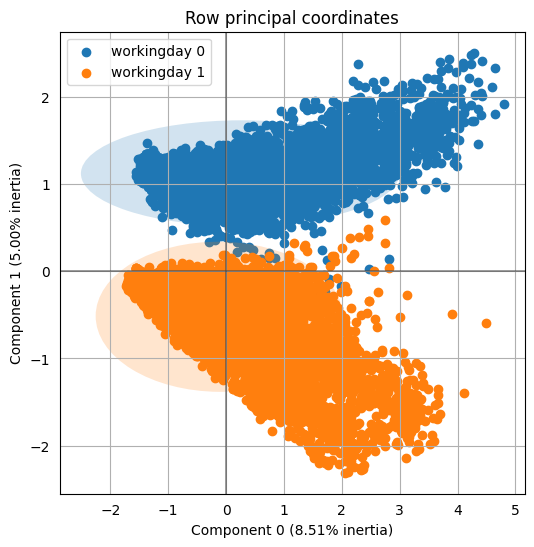

In [9]:
 ax = famd.plot_row_coordinates(
      df_famd,
      ax=None, 
      figsize=(6, 6), 
      x_component=0,
      y_component=1,
      #labels=df.index,
      color_labels=['workingday {}'.format(t) for t in df2['workingday']],
      ellipse_outline=False,
      ellipse_fill=True,
      show_points=True,
)

## Clustering  <a class="anchor" id="clust"></a>

Cluster Analysis (CA), simply said clustering, is one of the most important statistical methods for discovering knowledge in multidimensional data. The goal of CA is to identify patterns of similar units within a dataset.

### K-means <a class="anchor" id="kmeans"></a>

K-means clustering is the most used partitioning clustering algorithm. It classifies the n units to the K clusters such that units within the same cluster are as similar as possible (high cluster cohesion), whereas units from different clusters are as dissimilar as possible (high cluster separation). K-means uses Euclidean distance.

Let’s see which is the optimal number of clusters using the silhouette method

_Silhouette_

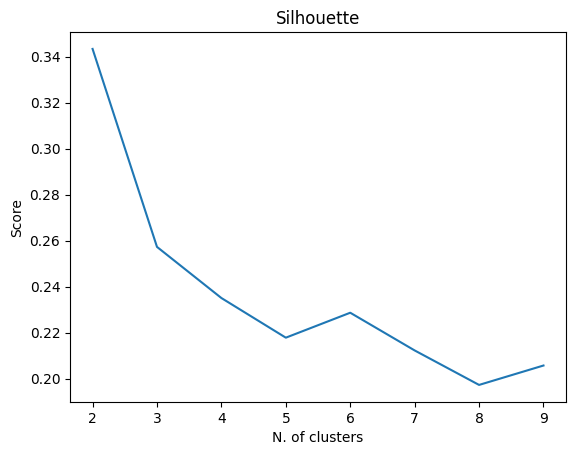

In [12]:
sc = []
for i in range (2, 10):
    kmeans = KMeans(n_clusters=i, init= 'k-means++', n_init = 10, max_iter=5, random_state=0)
    kmeans.fit(df_pca_scaled)
    label = kmeans.predict(df_pca_scaled)
    score = silhouette_score(df_pca_scaled, label)
    sc.append(score)
    
plt.plot(range(2,10), sc)
plt.title("Silhouette")
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.show()

According to the Silhouette plot and the _elbow rule_ the optimal number of cluster is 3

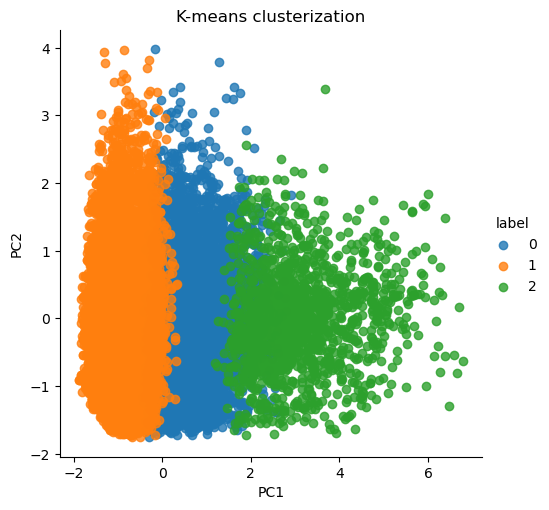

In [199]:
kmeans = KMeans(n_clusters=3, init= 'k-means++', n_init = 10, max_iter= 5,random_state=0)
kmeans.fit(df_pca_scaled)
label = pd.Series(kmeans.predict(df_pca_scaled))

pca_visual2 = pd.concat([pca_df, label], axis = 1)
pca_visual2.rename(columns= {0: 'label'}, inplace = True)

sns.lmplot(
    x='PC1',
    y='PC2',
    data=pca_visual2, 
    hue='label',  
    fit_reg=False, 
    legend=True
    )

plt.title('K-means clusterization')
plt.show()

### Kmodes <a class="anchor" id="kmodes"></a>


Kmodes is an extension of the kmeans method in which it’s possible to consider not only quantitative variables but also qualitative ones.
The modifications done in the k-means are:

- using a simple matching dissimilarity measure for categorical objects
- replacing means of clusters by modes
- using a frequency-based method to update the modes

In [13]:
df_modes = pd.read_csv('hour.csv')

Some preprocessing before applying the K-modes algorithm

In [14]:
cols = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in cols:
    df_modes[col] = df_modes[col].astype('category') 
    
df_modes = df_modes.drop(['cnt','instant','dteday','yr'], axis=1)    

In [15]:
scaler = RobustScaler()
df_modes_scaled = scaler.fit_transform(df_modes)
df_modes_scaled = pd.DataFrame(df_modes_scaled, columns=df_modes.columns)

In [16]:
df_modes_scaled.head()

season  mnth        hr  holiday  weekday  workingday  weathersit    temp  \
0    -2.0  -1.0 -1.000000      0.0     0.75        -1.0         0.0 -0.8125   
1    -2.0  -1.0 -0.916667      0.0     0.75        -1.0         0.0 -0.8750   
2    -2.0  -1.0 -0.833333      0.0     0.75        -1.0         0.0 -0.8750   
3    -2.0  -1.0 -0.750000      0.0     0.75        -1.0         0.0 -0.8125   
4    -2.0  -1.0 -0.666667      0.0     0.75        -1.0         0.0 -0.8125   

      atemp       hum  windspeed    casual  registered  
0 -0.683918  0.600000  -1.300268 -0.318182   -0.548387  
1 -0.736714  0.566667  -1.300268 -0.204545   -0.446237  
2 -0.736714  0.566667  -1.300268 -0.272727   -0.473118  
3 -0.683918  0.400000  -1.300268 -0.318182   -0.564516  
4 -0.683918  0.400000  -1.300268 -0.386364   -0.612903

_Scree Plot_

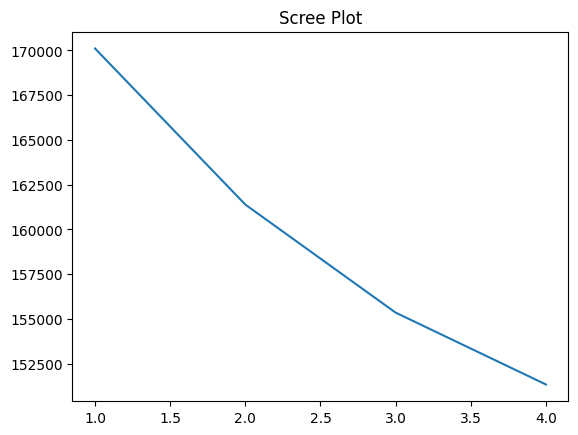

In [17]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, max_iter= 10)
    kmode.fit_predict(df_modes_scaled)
    cost.append(kmode.cost_)
    
y = np.array([i for i in range(1,5,1)])
plt.title("Scree Plot") 
plt.plot(y,cost)

In [18]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=0)
fitClusters_cao = km_cao.fit_predict(df_modes_scaled)

In [19]:
fitClusters_cao

array([0, 0, 0, ..., 0, 1, 1], dtype=uint16)

In [20]:
df_modes_scaled = df_modes_scaled.reset_index()

In [21]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df_modes, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index'], axis = 1)

Once we got to which cluster every observation belongs, we merged the original dataframe with the _'cluster_predicted'_ column 

In [22]:
combinedDf.head(10)

season mnth hr holiday weekday workingday weathersit  temp   atemp   hum  \
0      1    1  0       0       6          0          1  0.24  0.2879  0.81   
1      1    1  1       0       6          0          1  0.22  0.2727  0.80   
2      1    1  2       0       6          0          1  0.22  0.2727  0.80   
3      1    1  3       0       6          0          1  0.24  0.2879  0.75   
4      1    1  4       0       6          0          1  0.24  0.2879  0.75   
5      1    1  5       0       6          0          2  0.24  0.2576  0.75   
6      1    1  6       0       6          0          1  0.22  0.2727  0.80   
7      1    1  7       0       6          0          1  0.20  0.2576  0.86   
8      1    1  8       0       6          0          1  0.24  0.2879  0.75   
9      1    1  9       0       6          0          1  0.32  0.3485  0.76   

   windspeed  casual  registered  cluster_predicted  
0     0.0000       3          13                  0  
1     0.0000       8          32                  0  
2     0.0000       5          27                  0  
3     0.0000       3          10                  0  
4     0.0000       0           1                  0  
5     0.0896       0           1                  0  
6     0.0000       2           0                  0  
7     0.0000       1           2                  0  
8     0.0000       1           7                  0  
9     0.0000       8           6                  0

In [23]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

Here follow some data visualization about the predicted clusters with respect some categorical features

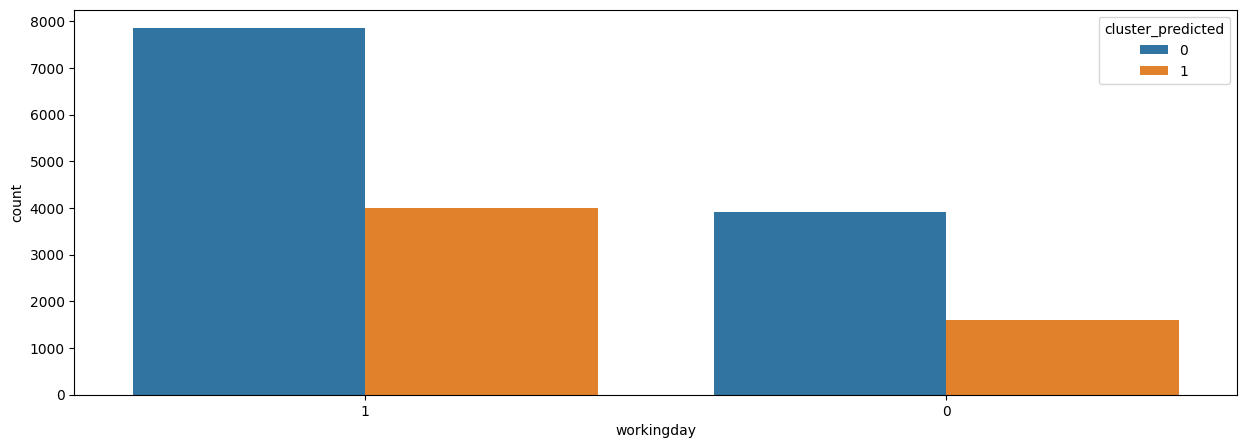

In [24]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['workingday'],order=combinedDf['workingday'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()


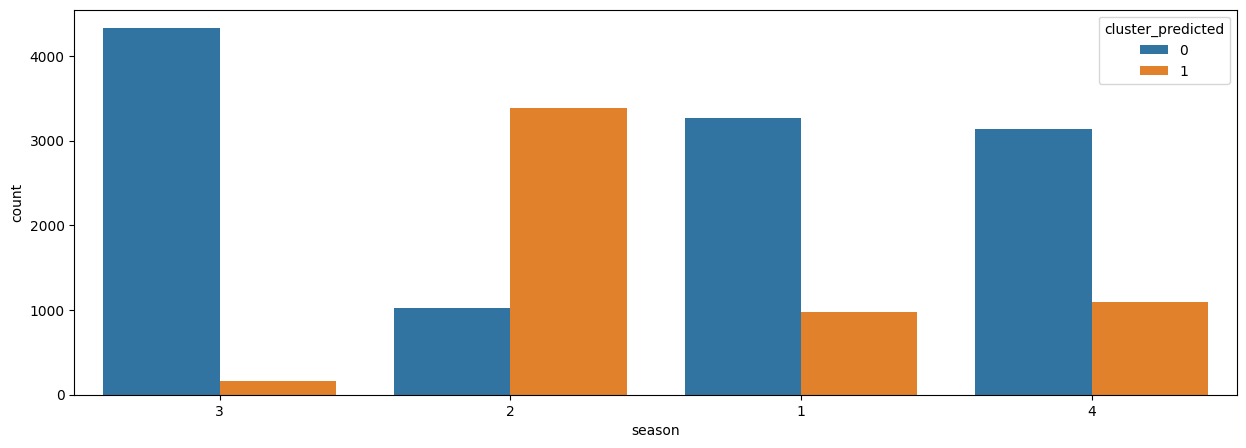

In [25]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['season'],order=combinedDf['season'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

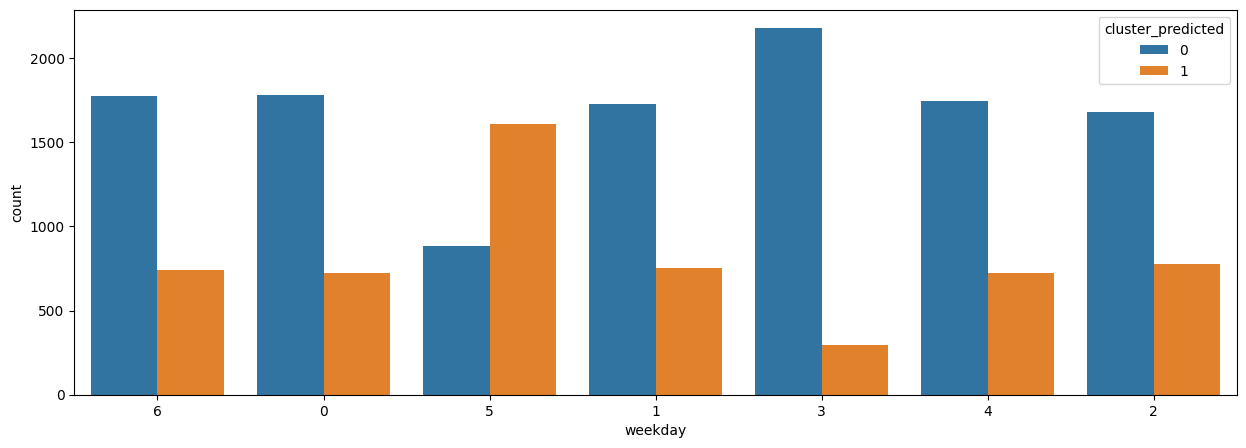

In [26]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['weekday'],order=combinedDf['weekday'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

### Hierarchical Clustering <a class="anchor" id="hir"></a>

Hierarchical clustering is a method of cluster analysis that seeks to build a hierarchy of clusters. There are two different approaches:
- Agglomerative: start with the points as individual clusters, then at each step merge the closest pair of clusters until only one cluster (or k clusters) is left.
- Divisive: start with one all-inclusive cluster, then at each step split a cluster until each cluster contains a point (or there are k clusters)

In this case we are going to follow an Agglomerative approach.

The Agglomerative Clustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

**Ward** minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

In [216]:
plt.figure(figsize = (10,10))
plt.title("Bike Sharing dataset dendrograms")
dend = shc.dendrogram(shc.linkage(df_pca_scaled, method = 'ward'),color_threshold = 150) 
#ward is the method through which we apply the agglomerative clustering
#metric = euclidean is the deafult
plt.axhline(y = 150, color = 'r', linestyle = '-')

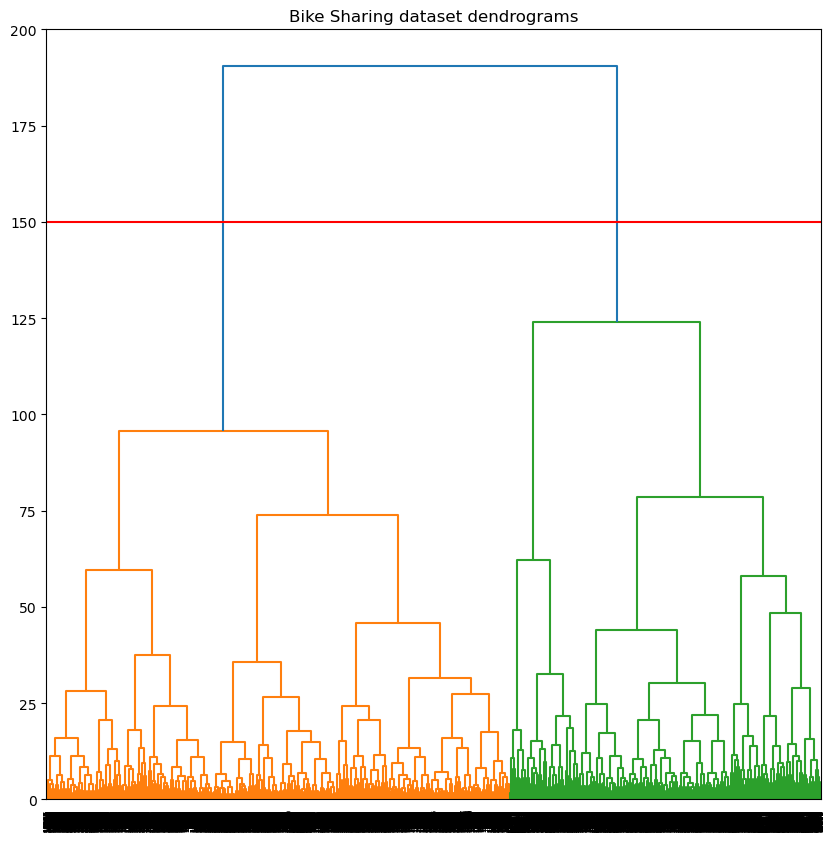

In [217]:
plt.show()

In the dendrogram we have to locate the largest vertical difference between nodes. The number of vertical lines intersecting this horizontal line is the optimal number of clusters. In our case, the largest vertical distance between nodes leads us with the result of k = 2 clusters.
To conlcude this part of our analysis, we want to visualize the clusters in the PCA space through a scatterplot.

# Semi-Supervised Learning <a class="anchor" id="semi"></a>

Semi-supervised learning is a machine learning approach that involves training a model using a combination of labeled and unlabeled data. The goal is to make use of the large amounts of unlabeled data that are often available in real-world applications, while still leveraging the information provided by the labeled data.

In the context of the self-training model that we implemented, the base estimator was trained on a combination of labeled and predicted labeled examples. The labeled examples were used to initialize the base estimator, and the remaining examples were treated as unlabeled. The model iteratively predicted labels for the unlabeled examples and added them to the training set, effectively "teaching itself" to make better predictions.

Overall, the self-training model can be a useful approach when there is a limited amount of labeled data available, but a large amount of unlabeled data that can be used to improve the model's performance.

In the **context of regression**, a label refers to the correct output value for a given data point. For example, if you are trying to predict the price of a house given its size, location, and other features, the label for a particular house would be the true price of that house. The label is also sometimes called the target variable or the dependent variable.

In [218]:
#Defining the class of the self training regressor
class SelfTrainingRegressor(BaseEstimator):
    def __init__(self, base_estimator, n_labeled):
        self.base_estimator = base_estimator
        self.n_labeled = n_labeled
    
    def fit(self, X, y):
        # Remove a portion of the labels
        X_labeled, y_labeled = X[:self.n_labeled], y[:self.n_labeled]
        X_unlabeled, y_unlabeled = X[self.n_labeled:], y[self.n_labeled:]
        
        # Initialize the base estimator with the labeled examples
        self.base_estimator.fit(X_labeled, y_labeled)
        
        # Iteratively predict labels for the unlabeled examples
        # and add them to the training set
        for i in range(len(X_unlabeled)):
            predicted_label = self.base_estimator.predict(X_unlabeled[i].reshape(1, -1))
            self.base_estimator.fit(np.append(X_labeled, X_unlabeled[i]).reshape(-1, 1), 
                                    np.append(y_labeled, predicted_label))
            X_labeled = np.append(X_labeled, X_unlabeled[i]).reshape(-1, 1)
            y_labeled = np.append(y_labeled, predicted_label)
        return self
    
    def predict(self, X):
        return self.base_estimator.predict(X)

We load the dataset in new variables and split between train and test

In [219]:
# Load the dataset
X = df_oh.drop(columns=['cnt'])
y = df_oh['cnt']


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

The base estimator is the primary model that is being trained in the self-training model. In the code that we implemented, the base estimator was a gradient boosting model, which is an ensemble model that combines the predictions of multiple weak learners (e.g., decision trees) to produce a more accurate and stable prediction.

Gradient boosting is a popular machine learning algorithm that has been successful in a variety of applications. It works by training weak learners in sequence, with each learner attempting to correct the mistakes of the previous learner. The final model is a weighted sum of the weak learners, with the weights determined by the optimization of a loss function.


In [220]:
# Instantiate the base estimator as a gradient boosting model
base_estimator = GradientBoostingRegressor()

# Use the SelfTrainingRegressor to train the base estimator on a combination of 
# labeled and predicted labeled examples
self_training_model = SelfTrainingRegressor(base_estimator, n_labeled=len(X_train))
self_training_model.fit(X_train, y_train)

# Evaluate the performance of the self-training model on the test set
predictions = self_training_model.predict(X_test)

The final part of the code involves evaluating the performance of the self-training model using the R^2 score was calculated.

In [221]:
# Calculate the evaluation metrics
us_r2 = r2_score(y_test, predictions)

# Print the results
print(f'R^2: {us_r2:.2f}')

R^2: 0.75


We can see that the model performs well but not as good as supervised learning, it is important to note that the performance of a supervised model is dependent on the quality and quantity of the labeled data. If the labeled data is representative of the underlying distribution and provides sufficient information to learn the relevant patterns, a supervised model may be able to achieve good performance. On the other hand, if the labeled data is noisy or limited in some way, the model may not be able to learn the underlying patterns as accurately, leading to poorer performance.



# Other studies  <a class="anchor" id="ref"></a>

Multiple analysis have been made on that dataset, we will compare our results with 2 studies found on Kaggle: 
 1. [Study by Harsha Varshney](https://www.kaggle.com/code/harshavarshney/bike-sharing-demand-analysis-regression#MODEL-TRAINING)
 
 Best Result: MSE: 0.48
 
 
 2. [Study by Saurabh Mittal](https://www.kaggle.com/code/saurabhmittal1996/bike-sharing-data#Light-Gradient-Boosting-Model-is-giving-the-Best-Result-Lowest-Mean-Squared-Error)
 
 Best Result: MSE: 0.57
 
 As we can see in our results, our models outperformed both of the above studies
 
 

## Conclusion   <a class="anchor" id="conclusion"></a>

This analysis explored the use of different supervised learning models for predicting a continuous target variable. Several models were trained and evaluated using cross-validation, and their performance was compared using metrics such as mean squared error (MSE) and R^2.

The results showed that the **Extra Trees Regressor** model had the best performance, with a test **MSE** of 0.10 and an **R^2** of 0.95. This model was further fine-tuned using grid search with more iterations, and it was used to make predictions on real-world test data.

Overall, this analysis demonstrated the effectiveness of using supervised learning techniques for predicting continuous variables, and highlighted the importance of model selection and hyperparameter tuning in achieving good performance.


As regards unsupervised techniques, **PCA** performed well, being able to capture almost the 80% of data's variance with just 3 components.
However, components' interpretation is more difficult to be given, since it would necessary having a domain knowledge expertise.

Furthermore, different **clustering techniques** were applied, performing quite well, even though the data set at our disposal was not optimal for this kind of analysis.

In general clustering techniques required a lot of domain knowledge to be interpreted and well understood. From our analysis we can state that in the data are recognizable two different types of users: _casual ones_, that are often unregistered and tend to rent during the weekends; and _loyal ones_, more likely to be registered to the service and use the bikes for their daily commute to work.

Finally, one of the semi-supervised methods was tested which is the self training model, it achived accepted results but could not outperfrom the fully supervised models.